# Starlink Bent-Pipe Latency and Gateway Visibility Analysis
Connected Mobility Basics Group 7
- Yusuf Erdem Nacar
- Dan Bachar
- Jonas Jostan

_Summmer Semester 2025_

Imports:

In [4]:
import importlib
import parse
import matplotlib.pyplot as plt
import statistics
import datetime
from matplotlib.dates import DateFormatter, AutoDateLocator
import requests
import os

In [5]:
_ = importlib.reload(parse)

Parse the data:

In [6]:
measurements_dir = "measurements/"
measurement_info = {
    "118424999": "8.8.4.4",
    "119996550": "1.0.0.1",
    "119997715": "9.9.9.9",
    "121067126": "94.140.14.14",
    "120010694": "208.67.220.220",
}

all_measurements = []
for msm_id, target_ip in measurement_info.items():
    measurement_file = os.path.join(measurements_dir, f"{msm_id}.txt")
    if os.path.exists(measurement_file):
        print(f"Parsing {measurement_file} for target {target_ip}...")
        measurements = parse.parse_measurements(measurement_file, target_ip)
        for m in measurements:
            m.target_ip = target_ip
        all_measurements.extend(measurements)
    else:
        print(f"Warning: File not found {measurement_file}")

print(f"\nTotal measurements loaded from all files: {len(all_measurements)}")

gateway_ip = "100.64.0.1"

measurements_by_probe_id = {}
for measurement in all_measurements:
    if measurement.id not in measurements_by_probe_id:
        measurements_by_probe_id[measurement.id] = []
    measurements_by_probe_id[measurement.id].append(measurement)

probe_ids = list(measurements_by_probe_id.keys())

Parsing measurements/118424999.txt for target 8.8.4.4...
Parsing measurements/119996550.txt for target 1.0.0.1...
Parsing measurements/119997715.txt for target 9.9.9.9...
Parsing measurements/121067126.txt for target 94.140.14.14...
Parsing measurements/120010694.txt for target 208.67.220.220...

Total measurements loaded from all files: 63768


# Geolocation-based Analysis

In this section, data from all measurements are aggregated and analyzed together per probe, irrespective of the target DNS IP. The results are presented with respect to the probe's geographic location.

# Measurement Counts

## Total

In [7]:
total_measurements = len(all_measurements)
print(f"Total measurements: {total_measurements}")

Total measurements: 63768


## By Probe ID

In [8]:
print(r"\begin{table}[H]")
print(r"\centering")
print(r"\begin{tabular}{ll}")
print(r"\textbf{Probe ID} & \textbf{Measurement Count} \\")
print(r"\hline")
for probe_id, probe_measurements in measurements_by_probe_id.items():
    print(f"{probe_id} & {len(probe_measurements)} \\\\")
print(r"\end{tabular}")
print(r"\caption{Number of measurements per probe for measurement 118424999.}")
print(r"\label{tab:measurements_per_probe_118424999}")
print(r"\end{table}")

\begin{table}[H]
\centering
\begin{tabular}{ll}
\textbf{Probe ID} & \textbf{Measurement Count} \\
\hline
28430 & 1341 \\
60323 & 3274 \\
1006948 & 3357 \\
1006896 & 3355 \\
63025 & 3352 \\
51136 & 3358 \\
1010332 & 3353 \\
13040 & 3358 \\
1009988 & 3358 \\
1007159 & 2742 \\
1006477 & 3357 \\
1011217 & 3357 \\
1008228 & 3358 \\
1007645 & 1337 \\
62613 & 3226 \\
64237 & 3303 \\
50524 & 2584 \\
63017 & 3344 \\
1010769 & 3083 \\
1008786 & 3320 \\
22645 & 652 \\
25850 & 672 \\
54141 & 656 \\
1006295 & 671 \\
\end{tabular}
\caption{Number of measurements per probe for measurement 118424999.}
\label{tab:measurements_per_probe_118424999}
\end{table}


## By Probe ID Plotted

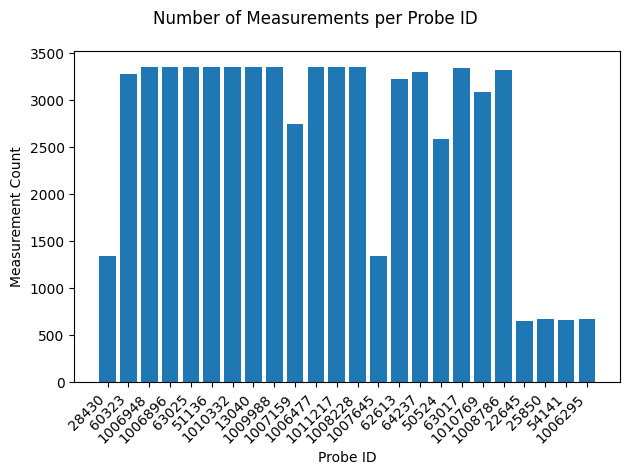

In [9]:
probe_ids = list(measurements_by_probe_id.keys())
measurement_counts = [len(measurements_by_probe_id[probe_id]) for probe_id in probe_ids]
fig, ax = plt.subplots()
ax.bar(probe_ids, measurement_counts)
ax.set_xlabel('Probe ID')
ax.set_ylabel('Measurement Count')
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
fig.suptitle('Number of Measurements per Probe ID')
fig.tight_layout()

# Successful vs Unsuccessful Measurements

## Total

Total measurements: 63768
Successful measurements: 62592 (98.16%)
Unsuccessful measurements: 1176 (1.84%)


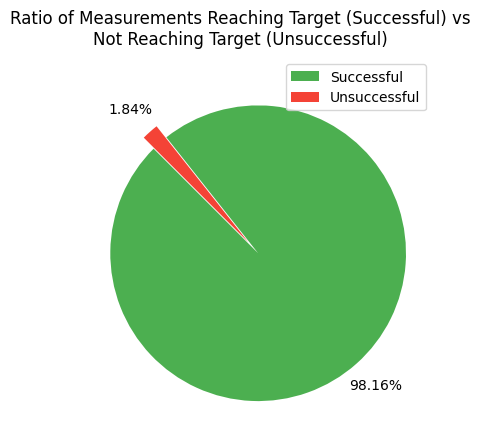

In [10]:
total_measurements = len(all_measurements)
print(f"Total measurements: {total_measurements}")
successful_measurements = [m for m in all_measurements if m.reached_target]
successful_count = len(successful_measurements)
print(f"Successful measurements: {successful_count} ({successful_count / total_measurements * 100:.2f}%)")
unsuccessful_measurements = [m for m in all_measurements if not m.reached_target]
unsuccessful_count = len(unsuccessful_measurements)
print(f"Unsuccessful measurements: {unsuccessful_count} ({unsuccessful_count / total_measurements * 100:.2f}%)")

labels = ['Successful', 'Unsuccessful']
sizes = [successful_count, unsuccessful_count]
colors = ['#4CAF50', '#F44336']
explode = (0.1, 0)
fig, ax1 = plt.subplots()
_ = ax1.pie(sizes, explode=explode, colors=colors, autopct='%.2f%%', startangle=135, pctdistance=1.2)
_ = ax1.legend(labels, loc="upper right")
_ = fig.suptitle('Ratio of Measurements Reaching Target (Successful) vs\nNot Reaching Target (Unsuccessful)')

## By Probe ID

In [11]:
print(r"\begin{table}[H]")
print(r"\centering")
print(r"\begin{tabular}{lll}")
print(r"\textbf{Probe ID} & \textbf{Successful} & \textbf{Unsuccessful} \\")
print(r"\hline")
for probe_id, probe_measurements in measurements_by_probe_id.items():
    successful_count = sum(1 for m in probe_measurements if m.reached_target)
    unsuccessful_count = len(probe_measurements) - successful_count
    print(f"{probe_id} & {successful_count} & {unsuccessful_count} \\\\")
print(r"\end{tabular}")
print(r"\caption{Successful and unsuccessful measurements per probe for measurement 118424999.}")
print(r"\label{tab:successful_unsuccessful_per_probe_118424999}")
print(r"\end{table}")

\begin{table}[H]
\centering
\begin{tabular}{lll}
\textbf{Probe ID} & \textbf{Successful} & \textbf{Unsuccessful} \\
\hline
28430 & 1179 & 162 \\
60323 & 3259 & 15 \\
1006948 & 3264 & 93 \\
1006896 & 3341 & 14 \\
63025 & 3328 & 24 \\
51136 & 3335 & 23 \\
1010332 & 3340 & 13 \\
13040 & 3345 & 13 \\
1009988 & 3342 & 16 \\
1007159 & 2729 & 13 \\
1006477 & 3335 & 22 \\
1011217 & 3356 & 1 \\
1008228 & 3345 & 13 \\
1007645 & 1333 & 4 \\
62613 & 3090 & 136 \\
64237 & 2786 & 517 \\
50524 & 2556 & 28 \\
63017 & 3330 & 14 \\
1010769 & 3065 & 18 \\
1008786 & 3315 & 5 \\
22645 & 635 & 17 \\
25850 & 669 & 3 \\
54141 & 647 & 9 \\
1006295 & 668 & 3 \\
\end{tabular}
\caption{Successful and unsuccessful measurements per probe for measurement 118424999.}
\label{tab:successful_unsuccessful_per_probe_118424999}
\end{table}


## By Probe ID Plotted

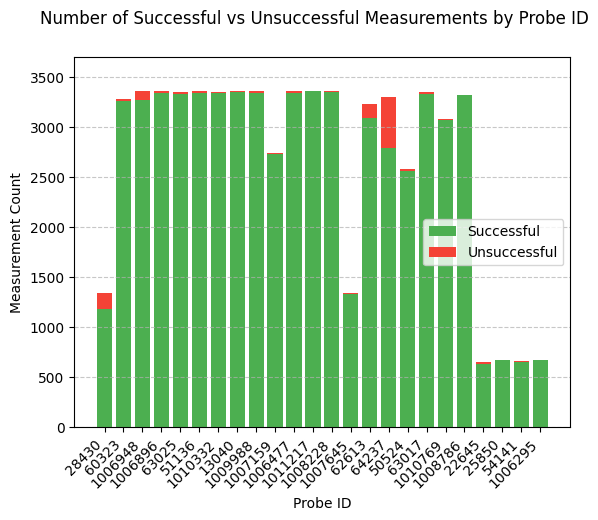

In [12]:
fig, ax1 = plt.subplots()
successful = [sum(1 for m in measurements_by_probe_id[probe_id] if m.reached_target) for probe_id in probe_ids]
unsuccessful = [sum(1 for m in measurements_by_probe_id[probe_id] if not m.reached_target) for probe_id in probe_ids]
ax1.bar(probe_ids, successful, label='Successful', color='#4CAF50')
ax1.bar(probe_ids, unsuccessful, label='Unsuccessful', color='#F44336', bottom=successful)
ax1.set_xlabel('Probe ID')
ax1.set_ylabel('Measurement Count')
ax1.set_ylim(0, max([s + u for s, u in zip(successful, unsuccessful)]) * 1.1)
for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
fig.suptitle('Number of Successful vs Unsuccessful Measurements by Probe ID')
_ = ax1.legend()

# Gateway Visibility

## Total

Measurements where gateway IP (100.64.0.1) is present:	55184
Measurements where gateway IP (100.64.0.1) is absent:	8584
Figure size: 6.4 x 4.8 inches


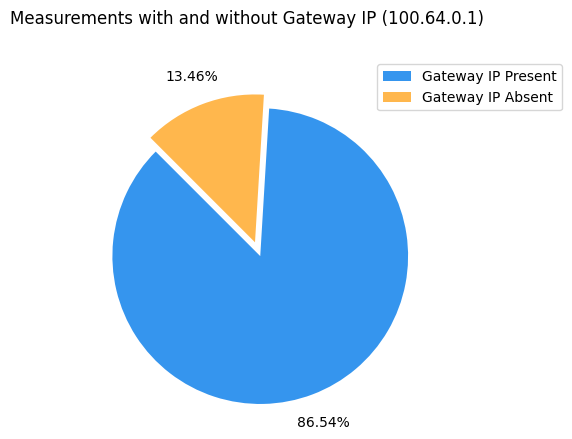

In [13]:
gateway_present, gateway_absent = parse.get_probe_measurements_with_and_without_ip(all_measurements, gateway_ip)
print(f"Measurements where gateway IP ({gateway_ip}) is present:\t{len(gateway_present)}")
print(f"Measurements where gateway IP ({gateway_ip}) is absent:\t{len(gateway_absent)}")

fig, ax1 = plt.subplots()
labels = ['Gateway IP Present', 'Gateway IP Absent']
sizes = [len(gateway_present), len(gateway_absent)]
colors = ["#3595EE", "#FFB74D"]
explode = (0.1, 0)
_ = ax1.pie(sizes, explode=explode, colors=colors, autopct='%.2f%%', startangle=135, pctdistance=1.2)
_ = ax1.legend(labels, loc="upper right", bbox_to_anchor=(1.35, 1))
_ = fig.suptitle('Measurements with and without Gateway IP (' + gateway_ip + ')')

fig_size = fig.get_size_inches()
print(f"Figure size: {fig_size[0]} x {fig_size[1]} inches")

## Total (with Success or Failure)

Successful measurements where gateway IP (100.64.0.1) is present: 55099
Successful measurements where gateway IP (100.64.0.1) is absent: 7493
Unsuccessful measurements where gateway IP (100.64.0.1) is present: 85
Unsuccessful measurements where gateway IP (100.64.0.1) is absent: 1091


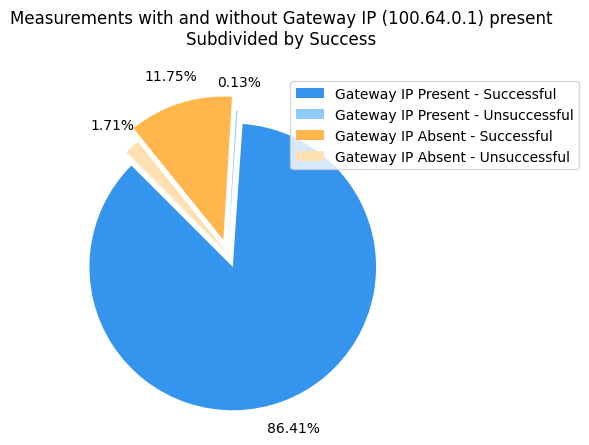

In [14]:
gateway_present_successful = [m for m in gateway_present if m.reached_target]
gateway_present_unsuccessful = [m for m in gateway_present if not m.reached_target]
gateway_absent_successful = [m for m in gateway_absent if m.reached_target]
gateway_absent_unsuccessful = [m for m in gateway_absent if not m.reached_target]
print(f"Successful measurements where gateway IP ({gateway_ip}) is present: {len(gateway_present_successful)}")
print(f"Successful measurements where gateway IP ({gateway_ip}) is absent: {len(gateway_absent_successful)}")
print(f"Unsuccessful measurements where gateway IP ({gateway_ip}) is present: {len(gateway_present_unsuccessful)}")
print(f"Unsuccessful measurements where gateway IP ({gateway_ip}) is absent: {len(gateway_absent_unsuccessful)}")
fig, ax1 = plt.subplots(figsize=(6, 4.5))
labels = ['Gateway IP Present - Successful', 'Gateway IP Present - Unsuccessful',
          'Gateway IP Absent - Successful', 'Gateway IP Absent - Unsuccessful']
sizes = [len(gateway_present_successful), len(gateway_present_unsuccessful),
         len(gateway_absent_successful), len(gateway_absent_unsuccessful)]
colors = ["#3595EE", "#90CAF9", "#FFB74D", "#FFE0B2"]
explode = (0.1, 0, 0.1, 0)
_ = ax1.pie(sizes, explode=explode, colors=colors, autopct='%.2f%%', startangle=135, pctdistance=1.2)
_ = ax1.legend(labels, loc="upper right", bbox_to_anchor=(1.5, 1))
_ = fig.suptitle('Measurements with and without Gateway IP (' + gateway_ip + ') present\nSubdivided by Success')
_ = fig.tight_layout()

Measurements where gateway IP (100.64.0.1) is present:	55184
Measurements where gateway IP (100.64.0.1) is absent:	8584
Figure size: 6.4 x 4.8 inches


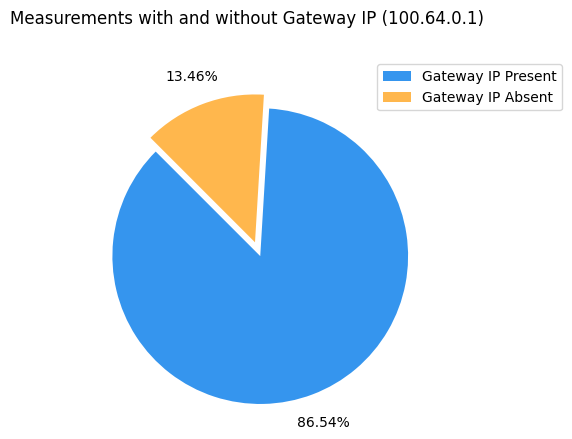

In [15]:
gateway_present, gateway_absent = parse.get_probe_measurements_with_and_without_ip(all_measurements, gateway_ip)
print(f"Measurements where gateway IP ({gateway_ip}) is present:\t{len(gateway_present)}")
print(f"Measurements where gateway IP ({gateway_ip}) is absent:\t{len(gateway_absent)}")

fig, ax1 = plt.subplots()
labels = ['Gateway IP Present', 'Gateway IP Absent']
sizes = [len(gateway_present), len(gateway_absent)]
colors = ["#3595EE", "#FFB74D"]
explode = (0.1, 0)
_ = ax1.pie(sizes, explode=explode, colors=colors, autopct='%.2f%%', startangle=135, pctdistance=1.2)
_ = ax1.legend(labels, loc="upper right", bbox_to_anchor=(1.35, 1))
_ = fig.suptitle('Measurements with and without Gateway IP (' + gateway_ip + ')')

fig_size = fig.get_size_inches()
print(f"Figure size: {fig_size[0]} x {fig_size[1]} inches")

## By Probe ID

In [16]:
successful_measurements = []
for probe_id, probe_measurements in measurements_by_probe_id.items():
    successful_measurements.extend([m for m in probe_measurements if m.reached_target])

successful_measurements_by_probe_id = {}
for measurement in successful_measurements:
    if measurement.id not in successful_measurements_by_probe_id:
        successful_measurements_by_probe_id[measurement.id] = []
    successful_measurements_by_probe_id[measurement.id].append(measurement)

In [17]:
successful_measurements_gateway_presence_per_probe_id = {probe_id: {"present": [], "absent": []} for probe_id in measurements_by_probe_id.keys()}
for probe_id, probe_measurements in successful_measurements_by_probe_id.items():
    present, absent = parse.get_probe_measurements_with_and_without_ip(probe_measurements, gateway_ip)
    successful_measurements_gateway_presence_per_probe_id[probe_id]["present"].extend(present)
    successful_measurements_gateway_presence_per_probe_id[probe_id]["absent"].extend(absent)

In [18]:
print(r"\begin{table}[H]")
print(r"\centering")
print(r"\begin{tabular}{lll}")
print(r"\textbf{Probe ID} & \textbf{Gateway IP Present} & \textbf{Gateway IP Absent} \\")
print(r"\hline")
for probe_id in probe_ids:
    present_count = len(successful_measurements_gateway_presence_per_probe_id[probe_id]["present"])
    absent_count = len(successful_measurements_gateway_presence_per_probe_id[probe_id]["absent"])
    print(f"{probe_id} & {present_count} & {absent_count} \\\\")
print(r"\end{tabular}")
print(r"\caption{Successful measurements with and without gateway IP presence per probe for measurement 118424999.}")
print(r"\label{tab:gateway_presence_per_probe_118424999}")
print(r"\end{table}")

\begin{table}[H]
\centering
\begin{tabular}{lll}
\textbf{Probe ID} & \textbf{Gateway IP Present} & \textbf{Gateway IP Absent} \\
\hline
28430 & 1142 & 37 \\
60323 & 3247 & 12 \\
1006948 & 0 & 3264 \\
1006896 & 3328 & 13 \\
63025 & 3314 & 14 \\
51136 & 3329 & 6 \\
1010332 & 3336 & 4 \\
13040 & 3343 & 2 \\
1009988 & 3317 & 25 \\
1007159 & 2719 & 10 \\
1006477 & 0 & 3335 \\
1011217 & 3323 & 33 \\
1008228 & 3341 & 4 \\
1007645 & 1313 & 20 \\
62613 & 3085 & 5 \\
64237 & 2780 & 6 \\
50524 & 2553 & 3 \\
63017 & 3321 & 9 \\
1010769 & 3055 & 10 \\
1008786 & 3305 & 10 \\
22645 & 634 & 1 \\
25850 & 667 & 2 \\
54141 & 647 & 0 \\
1006295 & 0 & 668 \\
\end{tabular}
\caption{Successful measurements with and without gateway IP presence per probe for measurement 118424999.}
\label{tab:gateway_presence_per_probe_118424999}
\end{table}


## By Probe ID Plotted

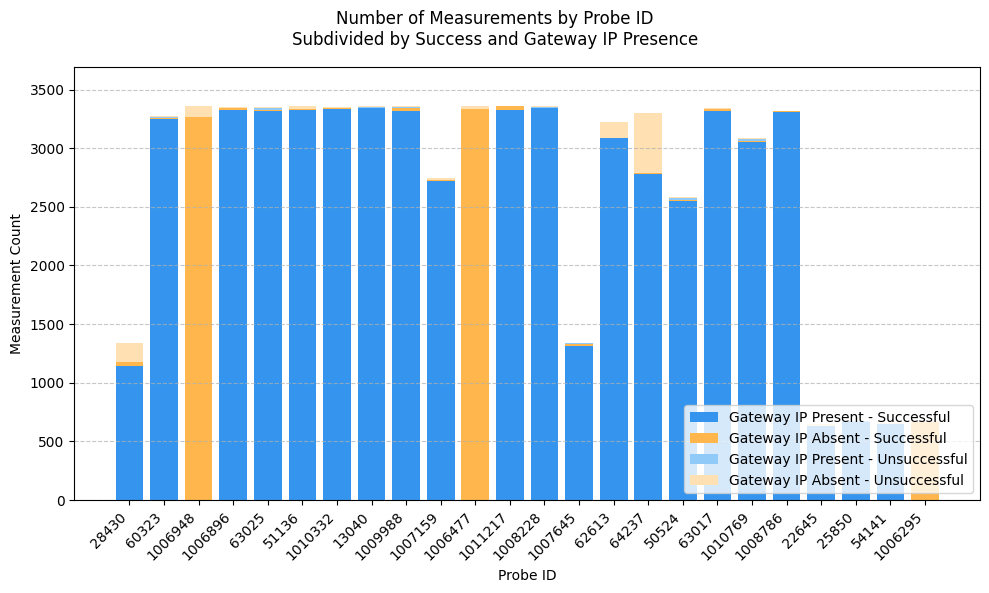

In [19]:
fig, ax1 = plt.subplots(figsize=(10, 6))

successful_present = [len(successful_measurements_gateway_presence_per_probe_id[probe_id]["present"]) for probe_id in probe_ids]
successful_absent = [len(successful_measurements_gateway_presence_per_probe_id[probe_id]["absent"]) for probe_id in probe_ids]

unsuccessful_measurements_by_probe_id = {
    probe_id: [m for m in measurements_by_probe_id.get(probe_id, []) if not m.reached_target]
    for probe_id in probe_ids
}

unsuccessful_present = []
unsuccessful_absent = []
for probe_id in probe_ids:
    present, absent = parse.get_probe_measurements_with_and_without_ip(unsuccessful_measurements_by_probe_id[probe_id], gateway_ip)
    unsuccessful_present.append(len(present))
    unsuccessful_absent.append(len(absent))

ax1.bar(probe_ids, successful_present, label='Gateway IP Present - Successful', color='#3595EE')
ax1.bar(probe_ids, successful_absent, label='Gateway IP Absent - Successful', color='#FFB74D', bottom=successful_present)
bottom_unsuccessful_present = [s + a for s, a in zip(successful_present, successful_absent)]
ax1.bar(probe_ids, unsuccessful_present, label='Gateway IP Present - Unsuccessful', color='#90CAF9', bottom=bottom_unsuccessful_present)
bottom_unsuccessful_absent = [s + a + u for s, a, u in zip(successful_present, successful_absent, unsuccessful_present)]
ax1.bar(probe_ids, unsuccessful_absent, label='Gateway IP Absent - Unsuccessful', color='#FFE0B2', bottom=bottom_unsuccessful_absent)


ax1.set_xlabel('Probe ID')
ax1.set_ylabel('Measurement Count')
total_heights = [sum(x) for x in zip(successful_present, successful_absent, unsuccessful_present, unsuccessful_absent)]
ax1.set_ylim(0, max(total_heights) * 1.1)

for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

fig.suptitle('Number of Measurements by Probe ID\nSubdivided by Success and Gateway IP Presence')
_ = ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
_ = ax1.legend(loc="lower right")
fig.tight_layout()

# Country Mappings

In [20]:
COUNTRY_TO_CONTINENT = {
    'DZ': 'Africa', 'AO': 'Africa', 'BJ': 'Africa', 'BW': 'Africa', 'BF': 'Africa', 'BI': 'Africa', 'CM': 'Africa', 'CV': 'Africa', 'CF': 'Africa', 'TD': 'Africa', 'KM': 'Africa', 'CG': 'Africa', 'CD': 'Africa', 'CI': 'Africa', 'DJ': 'Africa', 'EG': 'Africa', 'GQ': 'Africa', 'ER': 'Africa', 'SZ': 'Africa', 'ET': 'Africa', 'GA': 'Africa', 'GM': 'Africa', 'GH': 'Africa', 'GN': 'Africa', 'GW': 'Africa', 'KE': 'Africa', 'LS': 'Africa', 'LR': 'Africa', 'LY': 'Africa', 'MG': 'Africa', 'MW': 'Africa', 'ML': 'Africa', 'MR': 'Africa', 'MU': 'Africa', 'YT': 'Africa', 'MA': 'Africa', 'MZ': 'Africa', 'NA': 'Africa', 'NE': 'Africa', 'NG': 'Africa', 'RE': 'Africa', 'RW': 'Africa', 'SH': 'Africa', 'ST': 'Africa', 'SN': 'Africa', 'SC': 'Africa', 'SL': 'Africa', 'SO': 'Africa', 'ZA': 'Africa', 'SS': 'Africa', 'SD': 'Africa', 'TZ': 'Africa', 'TG': 'Africa', 'TN': 'Africa', 'UG': 'Africa', 'EH': 'Africa', 'ZM': 'Africa', 'ZW': 'Africa',
    'AF': 'Asia', 'AM': 'Asia', 'AZ': 'Asia', 'BH': 'Asia', 'BD': 'Asia', 'BT': 'Asia', 'BN': 'Asia', 'KH': 'Asia', 'CN': 'Asia', 'CY': 'Asia', 'GE': 'Asia', 'IN': 'Asia', 'ID': 'Asia', 'IR': 'Asia', 'IQ': 'Asia', 'IL': 'Asia', 'JP': 'Asia', 'JO': 'Asia', 'KZ': 'Asia', 'KP': 'Asia', 'KR': 'Asia', 'KW': 'Asia', 'KG': 'Asia', 'LA': 'Asia', 'LB': 'Asia', 'MO': 'Asia', 'MY': 'Asia', 'MV': 'Asia', 'MN': 'Asia', 'MM': 'Asia', 'NP': 'Asia', 'OM': 'Asia', 'PK': 'Asia', 'PS': 'Asia', 'PH': 'Asia', 'QA': 'Asia', 'SA': 'Asia', 'SG': 'Asia', 'LK': 'Asia', 'SY': 'Asia', 'TW': 'Asia', 'TJ': 'Asia', 'TH': 'Asia', 'TL': 'Asia', 'TR': 'Asia', 'TM': 'Asia', 'AE': 'Asia', 'UZ': 'Asia', 'VN': 'Asia', 'YE': 'Asia',
    'AL': 'Europe', 'AD': 'Europe', 'AT': 'Europe', 'BY': 'Europe', 'BE': 'Europe', 'BA': 'Europe', 'BG': 'Europe', 'HR': 'Europe', 'CZ': 'Europe', 'DK': 'Europe', 'EE': 'Europe', 'FO': 'Europe', 'FI': 'Europe', 'FR': 'Europe', 'DE': 'Europe', 'GI': 'Europe', 'GR': 'Europe', 'VA': 'Europe', 'HU': 'Europe', 'IS': 'Europe', 'IE': 'Europe', 'IT': 'Europe', 'LV': 'Europe', 'LI': 'Europe', 'LT': 'Europe', 'LU': 'Europe', 'MT': 'Europe', 'MD': 'Europe', 'MC': 'Europe', 'ME': 'Europe', 'NL': 'Europe', 'MK': 'Europe', 'NO': 'Europe', 'PL': 'Europe', 'PT': 'Europe', 'RO': 'Europe', 'RU': 'Europe', 'SM': 'Europe', 'RS': 'Europe', 'SK': 'Europe', 'SI': 'Europe', 'ES': 'Europe', 'SJ': 'Europe', 'SE': 'Europe', 'CH': 'Europe', 'UA': 'Europe', 'GB': 'Europe',
    'AG': 'North America', 'BS': 'North America', 'BB': 'North America', 'BZ': 'North America', 'CA': 'North America', 'CR': 'North America', 'CU': 'North America', 'DM': 'North America', 'DO': 'North America', 'SV': 'North America', 'GD': 'North America', 'GT': 'North America', 'HT': 'North America', 'HN': 'North America', 'JM': 'North America', 'MX': 'North America', 'NI': 'North America', 'PA': 'North America', 'KN': 'North America', 'LC': 'North America', 'VC': 'North America', 'TT': 'North America', 'US': 'North America',
    'AS': 'Oceania', 'AU': 'Oceania', 'CK': 'Oceania', 'FJ': 'Oceania', 'PF': 'Oceania', 'GU': 'Oceania', 'KI': 'Oceania', 'MH': 'Oceania', 'FM': 'Oceania', 'NR': 'Oceania', 'NC': 'Oceania', 'NZ': 'Oceania', 'NU': 'Oceania', 'NF': 'Oceania', 'MP': 'Oceania', 'PW': 'Oceania', 'PG': 'Oceania', 'PN': 'Oceania', 'WS': 'Oceania', 'SB': 'Oceania', 'TK': 'Oceania', 'TO': 'Oceania', 'TV': 'Oceania', 'VU': 'Oceania', 'WF': 'Oceania',
    'AR': 'South America', 'BO': 'South America', 'BR': 'South America', 'CL': 'South America', 'CO': 'South America', 'EC': 'South America', 'FK': 'South America', 'GF': 'South America', 'GY': 'South America', 'PY': 'South America', 'PE': 'South America', 'SR': 'South America', 'UY': 'South America', 'VE': 'South America',
}

def get_probe_location(probe_id):
    url = f"https://atlas.ripe.net/api/v2/probes/{probe_id}/"
    try:
        resp = requests.get(url, timeout=10)
        if resp.status_code == 200:
            data = resp.json()
            country = data.get('country_code', '')
            continent = COUNTRY_TO_CONTINENT.get(country, '')
            return country, continent
        else:
            return '', ''
    except Exception as e:
        return '', ''
    
old = [28430, 50941, 1002750, 64237, 13040, 14244, 63025, 1006948, 17889, 1007645, 63017, 62613, 60323, 1007159, 50524, 1011217, 1006295, 1010332, 51136, 1006896]
added = [1008228, 1009988, 1006477, 1010672, 1010769, 1008786]

print()
print("old")
print()
print(r"\begin{tabular}{l l l}")
print(r"\textbf{Probe ID} & \textbf{Country} & \textbf{Continent} \\")
print(r"\hline")
for probe_id in old:
    country, continent = get_probe_location(probe_id)
    print(f"{probe_id} & {country} & {continent} \\")
print(r"\end{tabular}")

print()
print("diff")
print()
print(r"\begin{tabular}{l l l}")
print(r"\textbf{Probe ID} & \textbf{Country} & \textbf{Continent} \\")
print(r"\hline")
for probe_id in added:
    country, continent = get_probe_location(probe_id)
    print(f"{probe_id} & {country} & {continent} \\")
print(r"\end{tabular}")

print(old)
print(added)

continents = {
    "Africa": {"probe_ids": []},
    "Asia": {"probe_ids": []},
    "Europe": {"probe_ids": []},
    "North America": {"probe_ids": []},
    "Oceania": {"probe_ids": []},
    "South America": {"probe_ids": []},
    "Unknown": {"probe_ids": []}
}

for probe_id in probe_ids:
    country, continent = get_probe_location(probe_id)
    if continent:
        continents[continent]["probe_ids"].append(probe_id)
    else:
        continents["Unknown"]["probe_ids"].append(probe_id)

for continent, info in continents.items():
    print(f"{continent}: {info['probe_ids']}")


old

\begin{tabular}{l l l}
\textbf{Probe ID} & \textbf{Country} & \textbf{Continent} \\
\hline
28430 & IT & Europe \
50941 & US & North America \
1002750 & DE & Europe \
64237 & MH & Oceania \
13040 & FR & Europe \


KeyboardInterrupt: 

# Bent Pipe Latency
For the probes that don't have the gateway IP 100.64.0.1 present in the trace, we assume the first visible IP is the gateway IP.

In [ ]:
all_successful_measurements_by_probe_id = {}
for probe_id in probe_ids:
    present_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
    absent_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("absent", [])
    all_successful_measurements_by_probe_id[probe_id] = present_measurements + absent_measurements

## Bent Pipe Latency Distribution per Probe ID

In [ ]:
import numpy as np
data = []
labels = []

sorted_probe_ids = []
for continent in sorted(continents.keys()):
    sorted_probe_ids.extend(sorted(continents[continent]["probe_ids"]))

for probe_id in sorted_probe_ids:
    probe_latencies = []
    
    all_measurements = all_successful_measurements_by_probe_id.get(probe_id, [])

    for measurement in all_measurements:
        latency = None
        for hop in measurement.hops:
            if hop.ip == gateway_ip and hop.rtt_times_ms:
                latency = statistics.mean(hop.rtt_times_ms)
                break
        
        if latency is None:
            first_star_found = False
            for hop in measurement.hops:
                if hop.ip == '*':
                    first_star_found = True
                elif first_star_found and hop.ip != '*' and hop.rtt_times_ms:
                    latency = statistics.mean(hop.rtt_times_ms)
                    break
        
        if latency is not None:
            probe_latencies.append(latency)

    if probe_latencies:
        p95 = np.percentile(probe_latencies, 95)
        filtered_latencies = [p for p in probe_latencies if p <= p95]
        if filtered_latencies:
            data.append(filtered_latencies)
            labels.append(str(probe_id))

            q1, q2, q3 = statistics.quantiles(probe_latencies, n=4)
            interquartile_range = q3 - q1
            lower_bound = q1 - 1.5 * interquartile_range
            upper_bound = q3 + 1.5 * interquartile_range

            outliers = [x for x in probe_latencies if x < lower_bound or x > upper_bound]
            inliers = [x for x in probe_latencies if lower_bound <= x <= upper_bound]

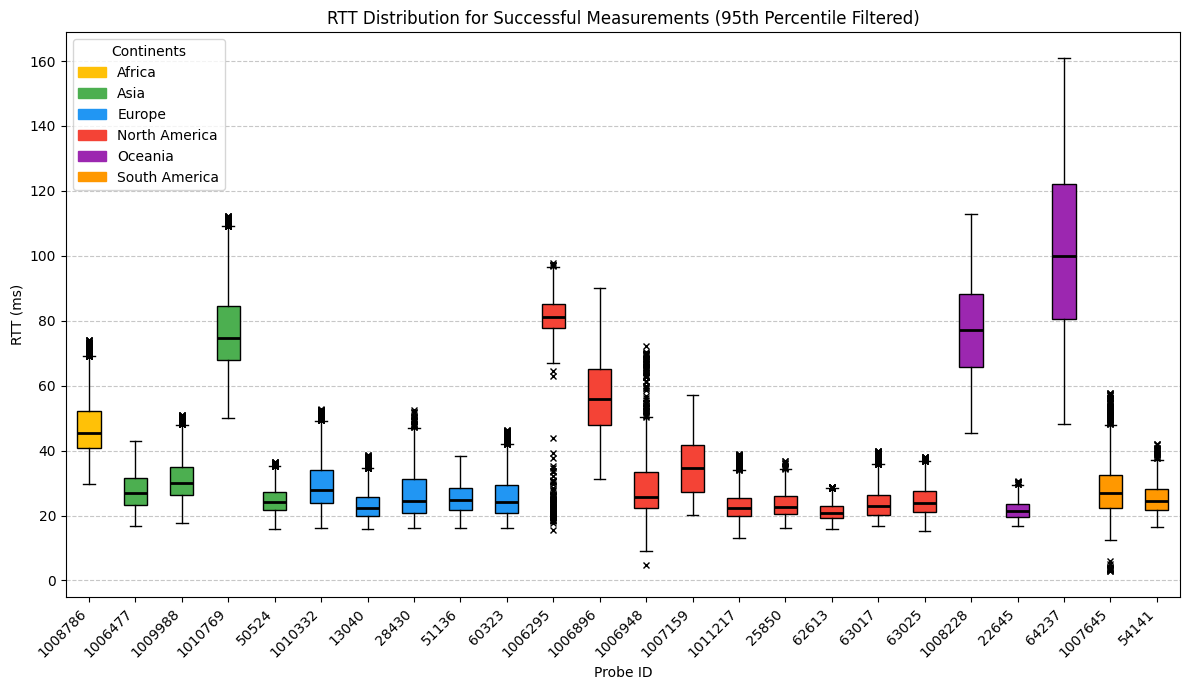

In [ ]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(12, 7))

probe_to_continent = {}
for continent, info in continents.items():
    for probe_id in info["probe_ids"]:
        probe_to_continent[str(probe_id)] = continent

continent_colors = {
    'Africa': '#FFC107',   # Amber
    'Asia': '#4CAF50',     # Green
    'Europe': '#2196F3',   # Blue
    'North America': '#F44336', # Red
    'Oceania': '#9C27B0',  # Purple
    'South America': '#FF9800', # Orange
    'Unknown': '#BDBDBD' # Gray
}

flierprops = dict(marker='x', markersize=5, linestyle='none', markeredgecolor='black')
bp = ax.boxplot(data, tick_labels=labels, flierprops=flierprops, patch_artist=True)

for i, patch in enumerate(bp['boxes']):
    probe_id = labels[i]
    continent = probe_to_continent.get(probe_id, "Unknown")
    color = continent_colors.get(continent, '#BDBDBD')
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color='black', linewidth=2)

legend_patches = [mpatches.Patch(color=color, label=continent) for continent, color in continent_colors.items() if continent in probe_to_continent.values()]
ax.legend(handles=legend_patches, title='Continents')

ax.set_xlabel('Probe ID')
ax.set_ylabel('Bent Pipe Latency (ms)')
ax.set_title('Bent Pipe Latency Distribution for Successful Measurements (95th Percentile Filtered)')
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()

## Median Bent Pipe Latency over Time per Probe ID

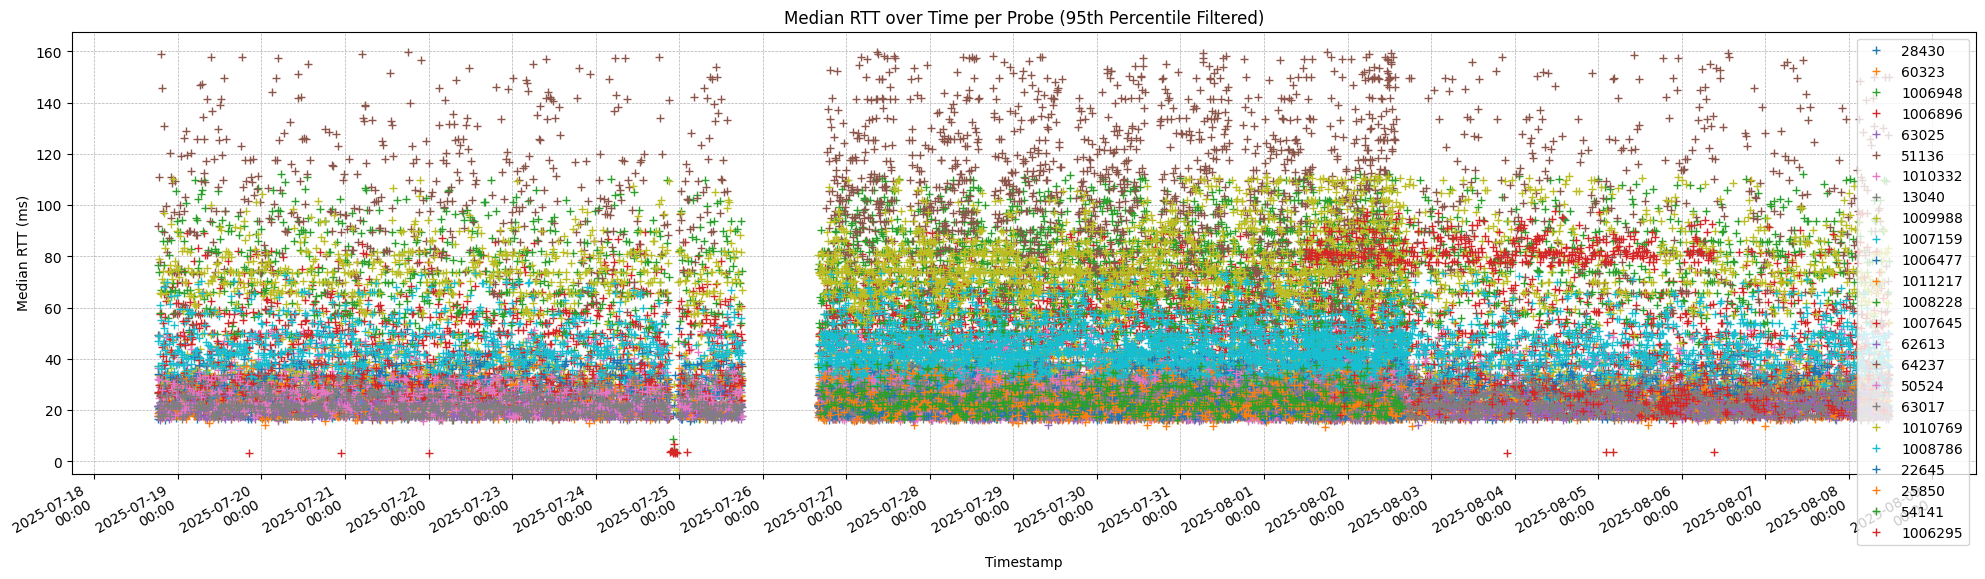

In [ ]:
probe_time_series = {probe_id: [] for probe_id in probe_ids}
probe_time_stamps = {probe_id: [] for probe_id in probe_ids}
for probe_id in probe_ids:
    all_measurements = all_successful_measurements_by_probe_id.get(probe_id, [])

    for measurement in sorted(all_measurements, key=lambda m: m.timestamp):
        latency = None
        for hop in measurement.hops:
            if hop.ip == gateway_ip and hop.rtt_times_ms:
                latency = statistics.median(hop.rtt_times_ms)
                break
        
        if latency is None:
            first_star_index = -1
            for i, hop in enumerate(measurement.hops):
                if hop.ip == '*':
                    first_star_index = i
                    break
            if first_star_index != -1:
                for i in range(first_star_index + 1, len(measurement.hops)):
                    hop = measurement.hops[i]
                    if hop.ip != '*' and hop.rtt_times_ms:
                        latency = statistics.median(hop.rtt_times_ms)
                        break
        
        if latency is not None:
            probe_time_series[probe_id].append(latency)
            probe_time_stamps[probe_id].append(datetime.datetime.fromtimestamp(measurement.timestamp))

fig, ax = plt.subplots(figsize=(20, 6))
for probe_id in probe_ids:
    y = probe_time_series[probe_id]
    x = probe_time_stamps[probe_id]
    if y:
        p95 = np.percentile(y, 95)
        filtered_x = [xi for xi, yi in zip(x, y) if yi <= p95]
        filtered_y = [yi for yi in y if yi <= p95]
        if filtered_y:
            ax.plot(filtered_x, filtered_y, '+', label=str(probe_id))

ax.set_xlabel("Timestamp")
ax.set_ylabel("Median Bent Pipe Latency (ms)")
ax.set_title("Median Bent Pipe Latency over Time per Probe (95th Percentile Filtered)")
ax.legend()
ax.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
fig.autofmt_xdate()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
fig.tight_layout()

Data prep for further plots:

In [ ]:
all_latencies_by_probe_id = {}
for probe_id, all_measurements in all_successful_measurements_by_probe_id.items():
    probe_latencies = []
    for measurement in all_measurements:
        latency = None
        for hop in measurement.hops:
            if hop.ip == gateway_ip and hop.rtt_times_ms:
                latency = statistics.mean(hop.rtt_times_ms)
                break
        
        if latency is None:
            first_star_index = -1
            for i, hop in enumerate(measurement.hops):
                if hop.ip == '*':
                    first_star_index = i
                    break
            if first_star_index != -1:
                for i in range(first_star_index + 1, len(measurement.hops)):
                    hop = measurement.hops[i]
                    if hop.ip != '*' and hop.rtt_times_ms:
                        latency = statistics.mean(hop.rtt_times_ms)
                        break
        
        if latency is not None:
            probe_latencies.append(latency)
    
    if probe_latencies:
        all_latencies_by_probe_id[probe_id] = probe_latencies

### Bent Pipe Latencies per probe per continent

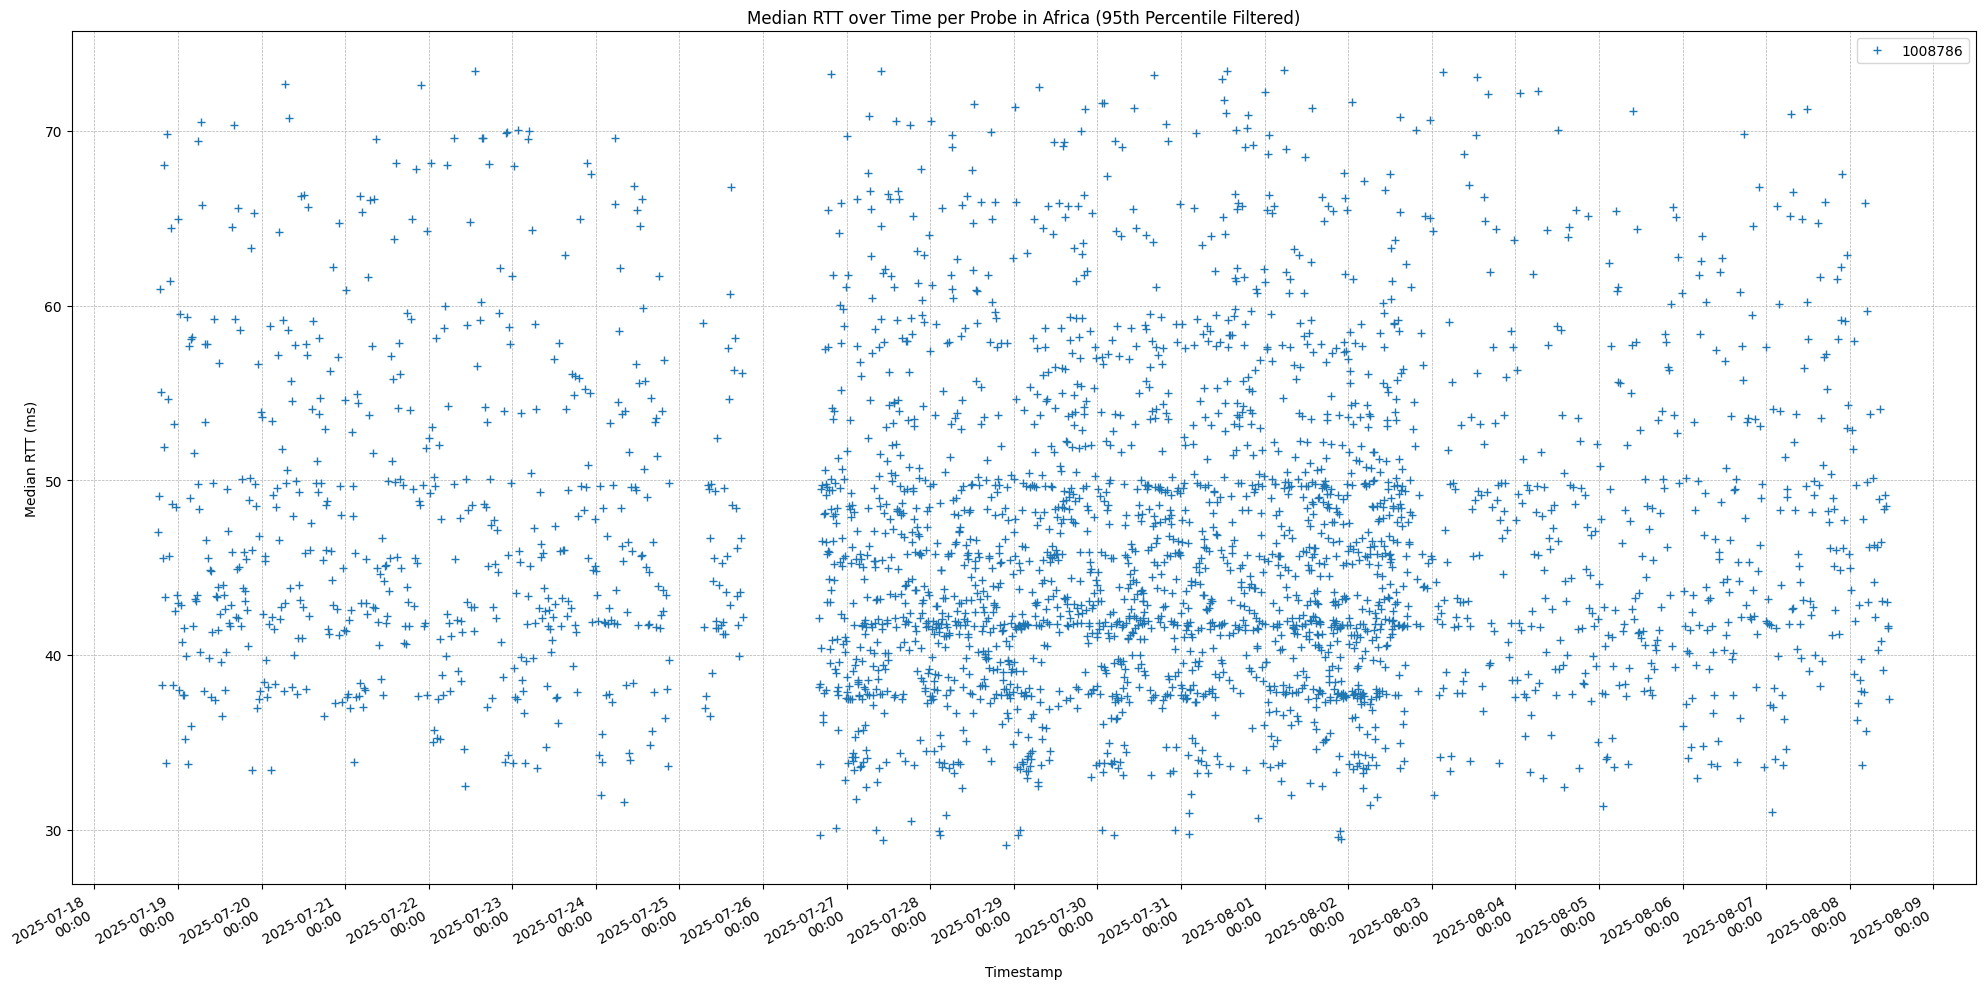

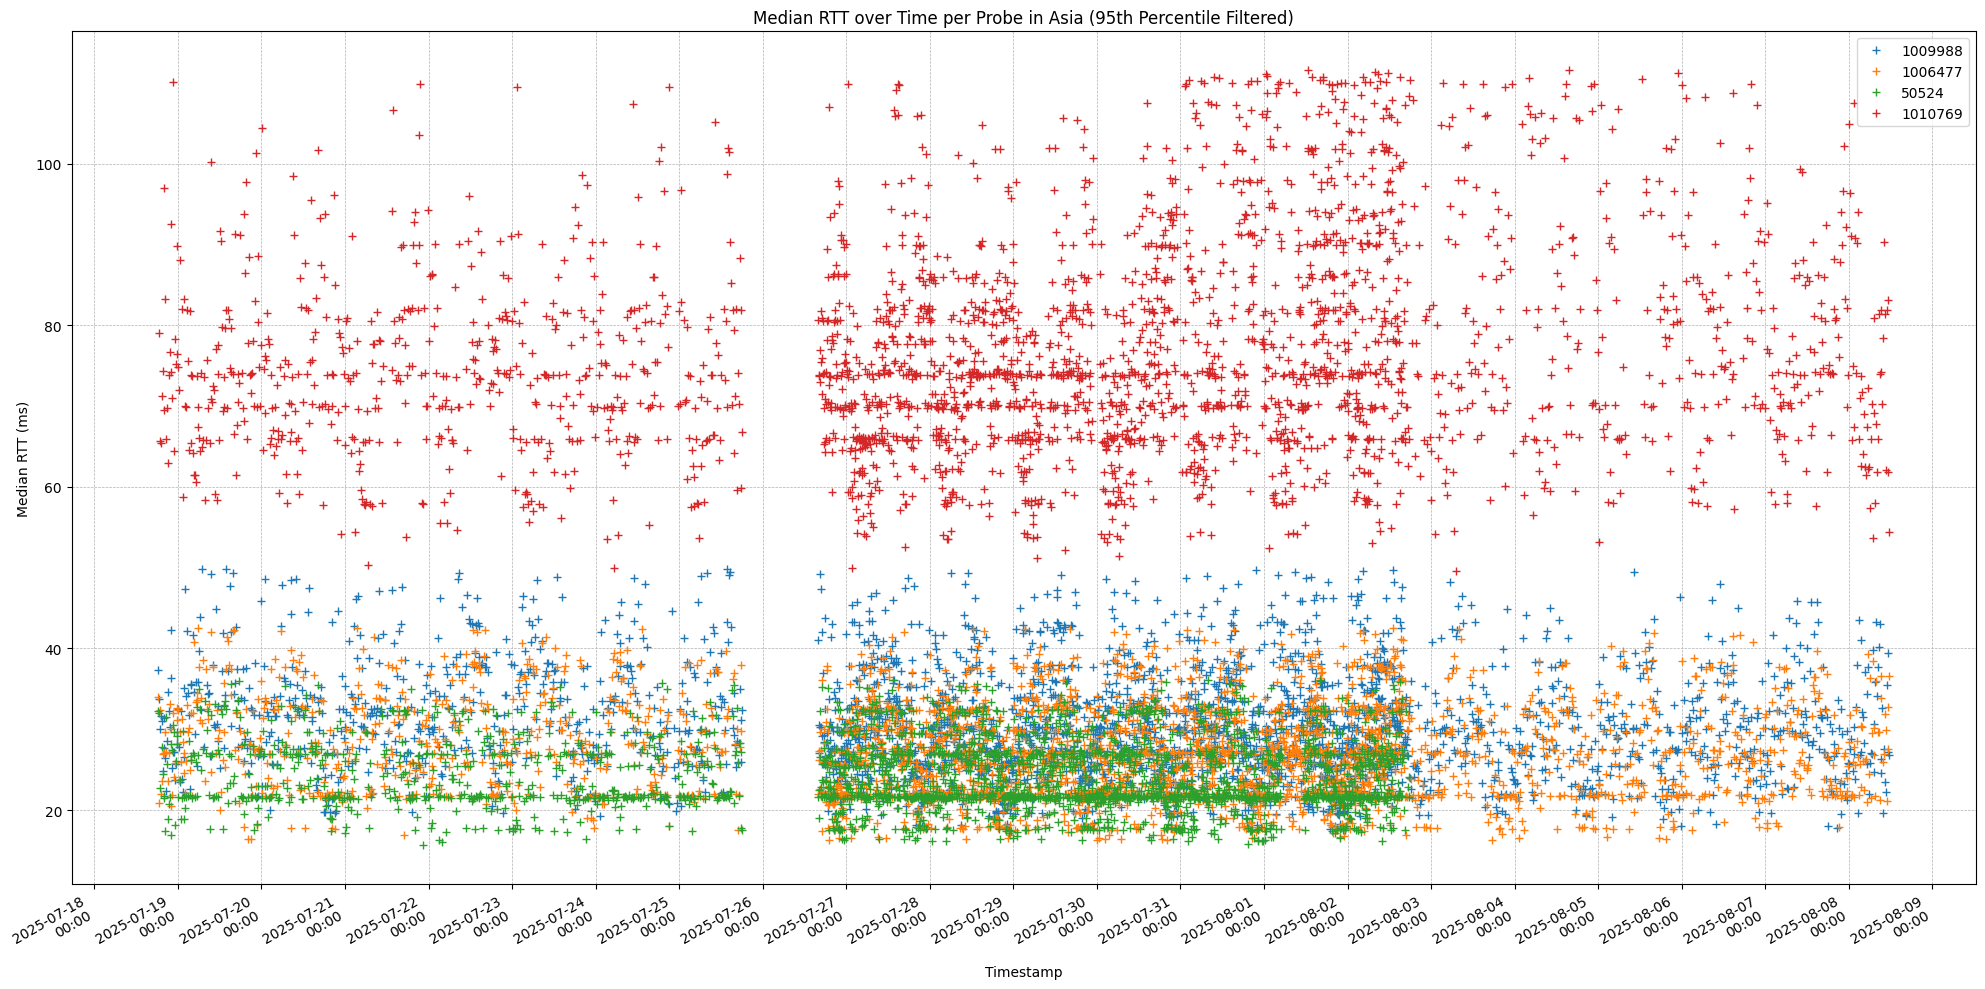

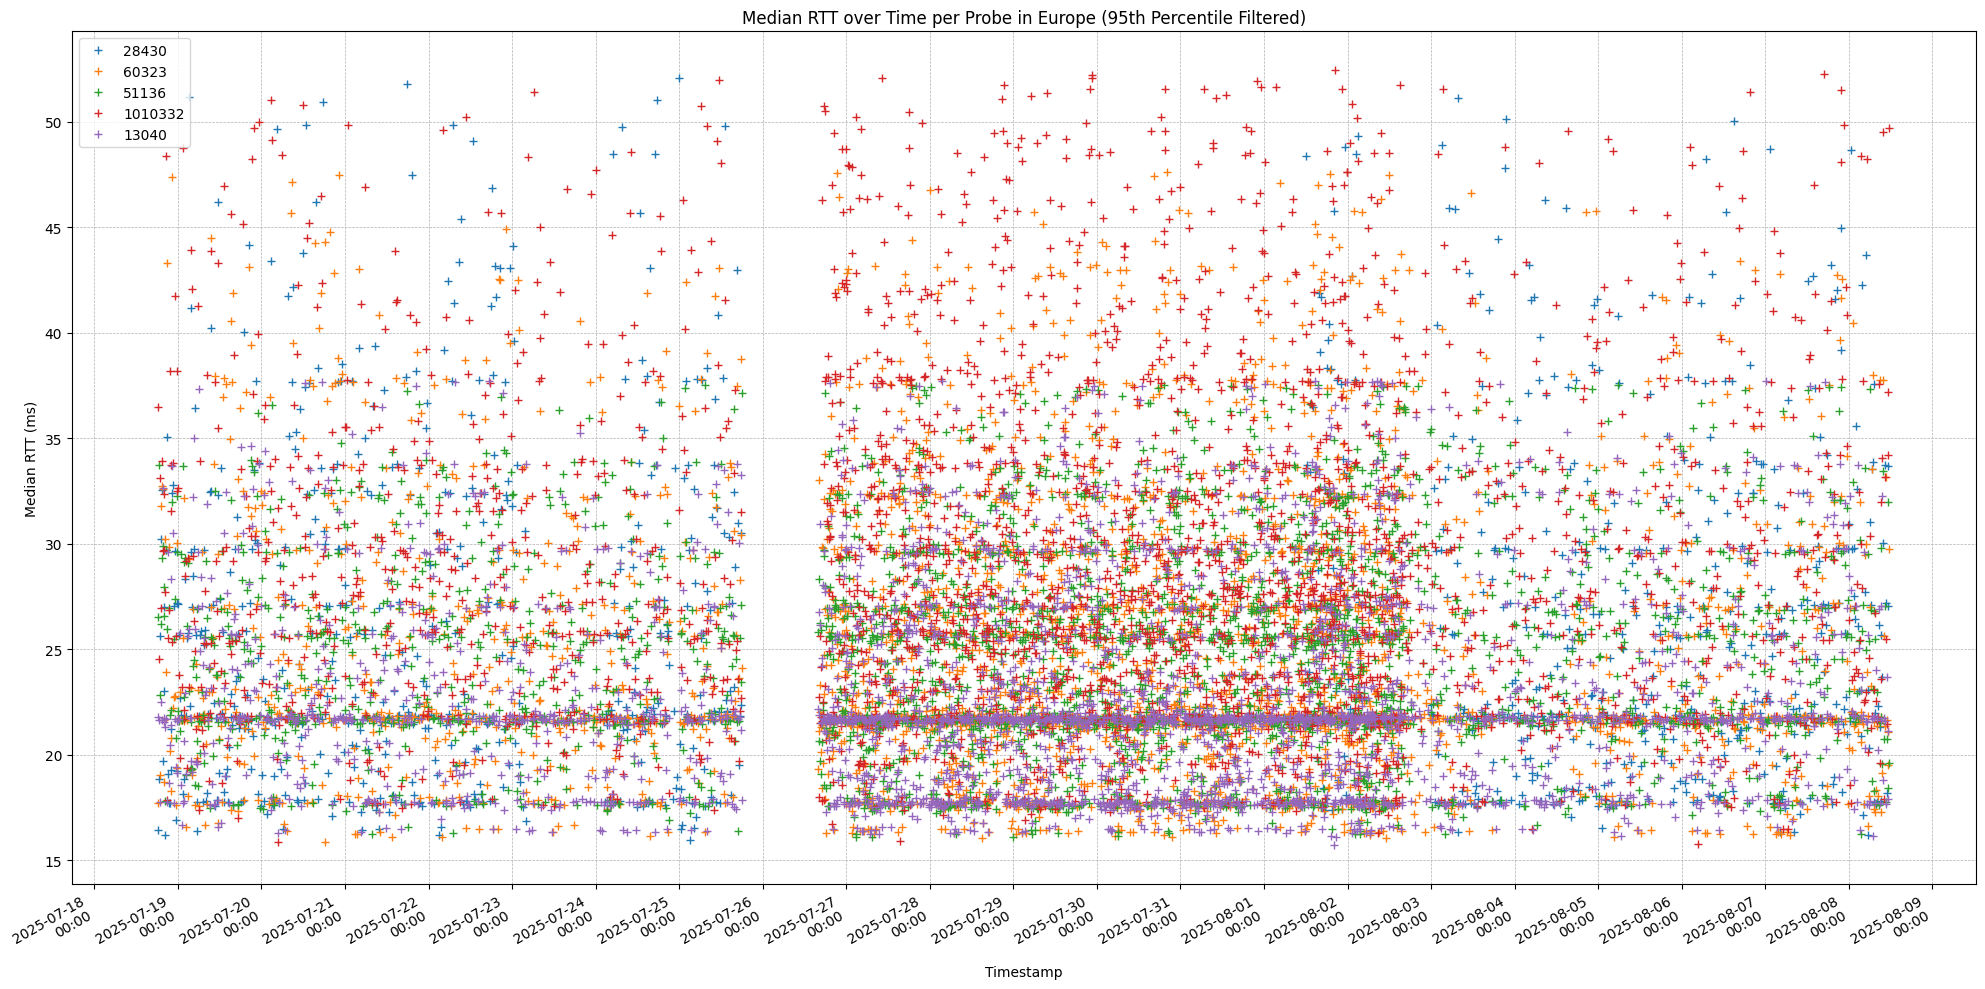

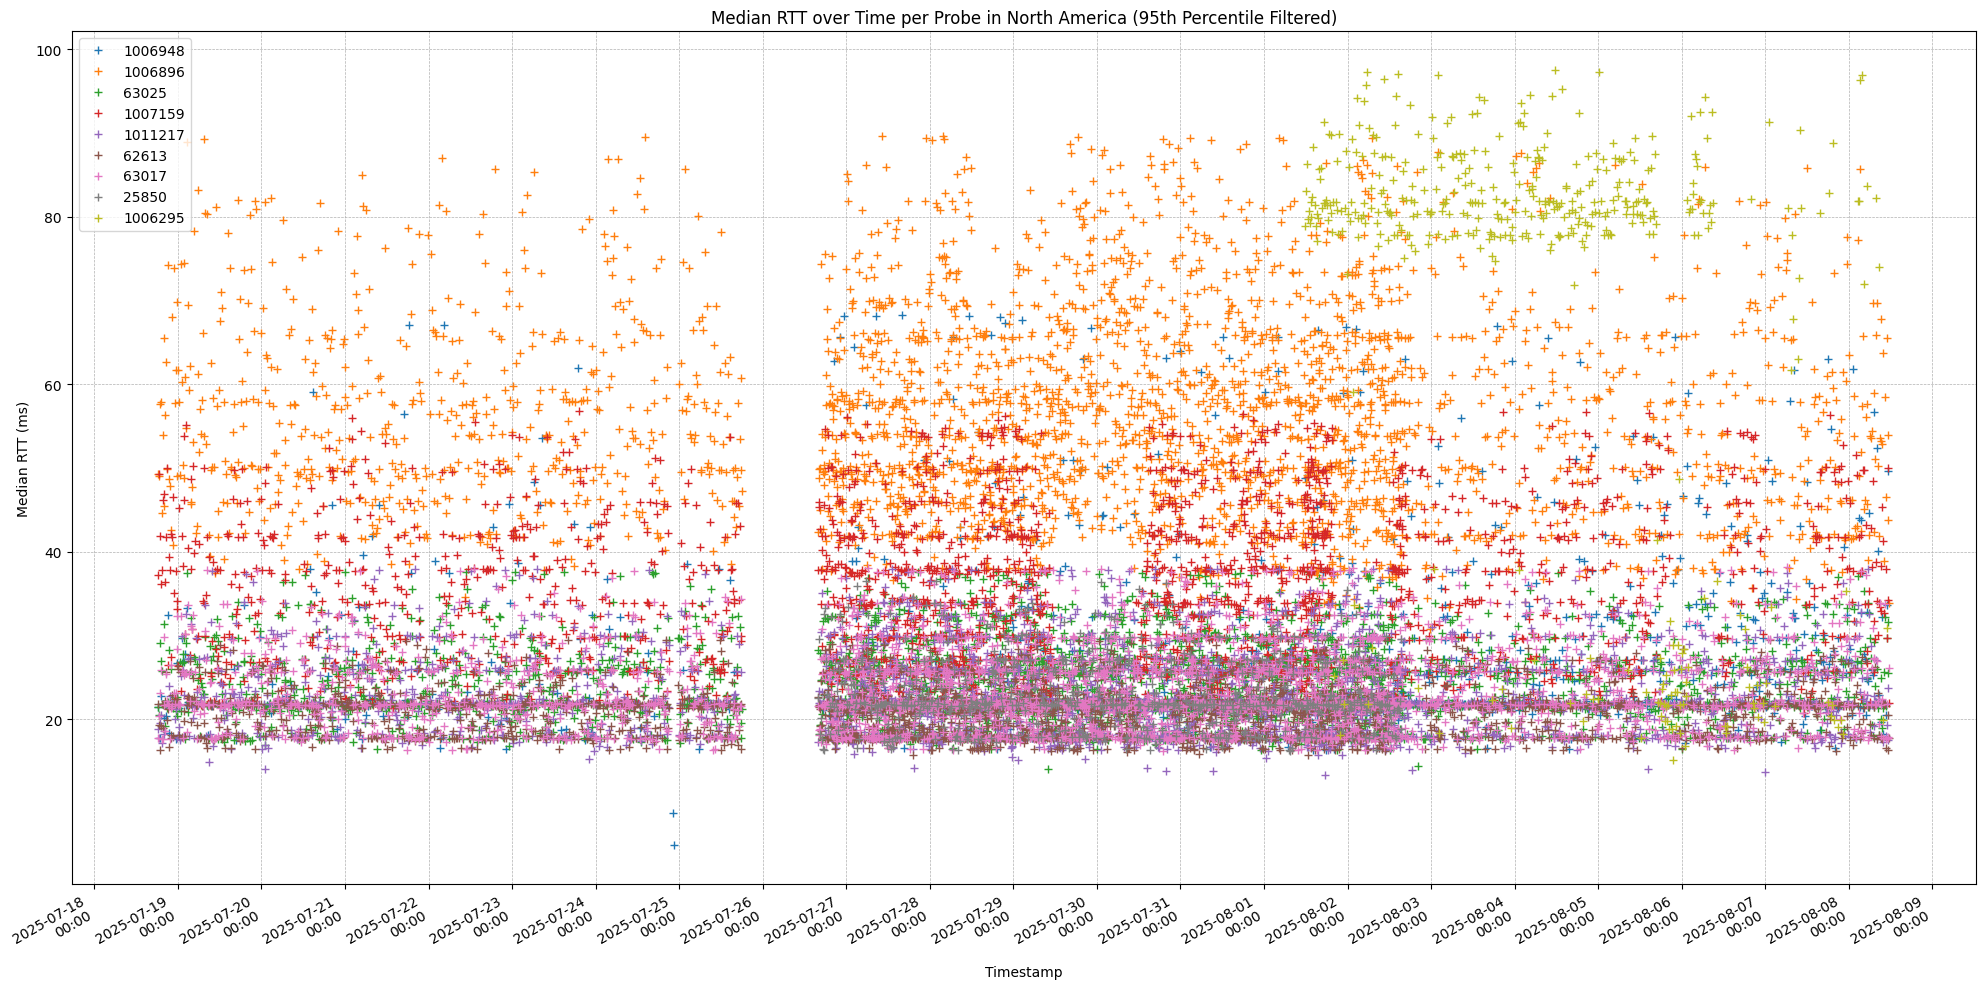

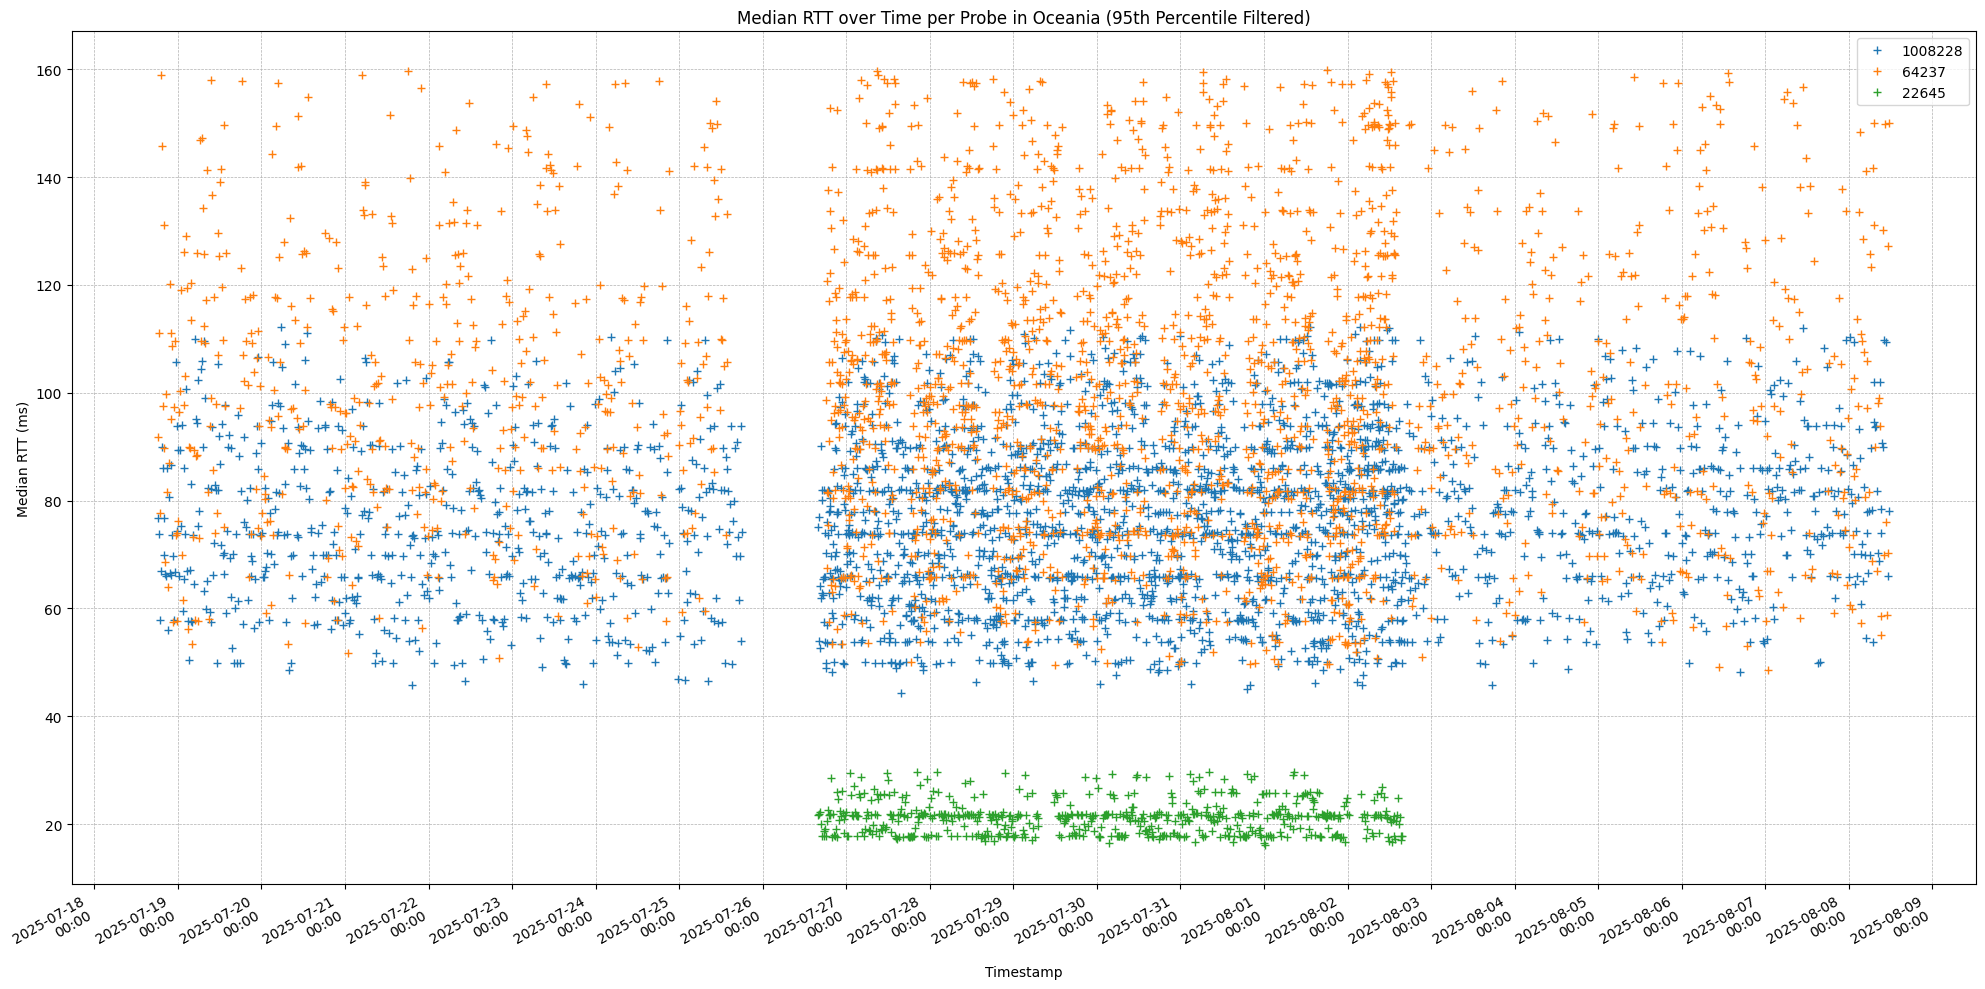

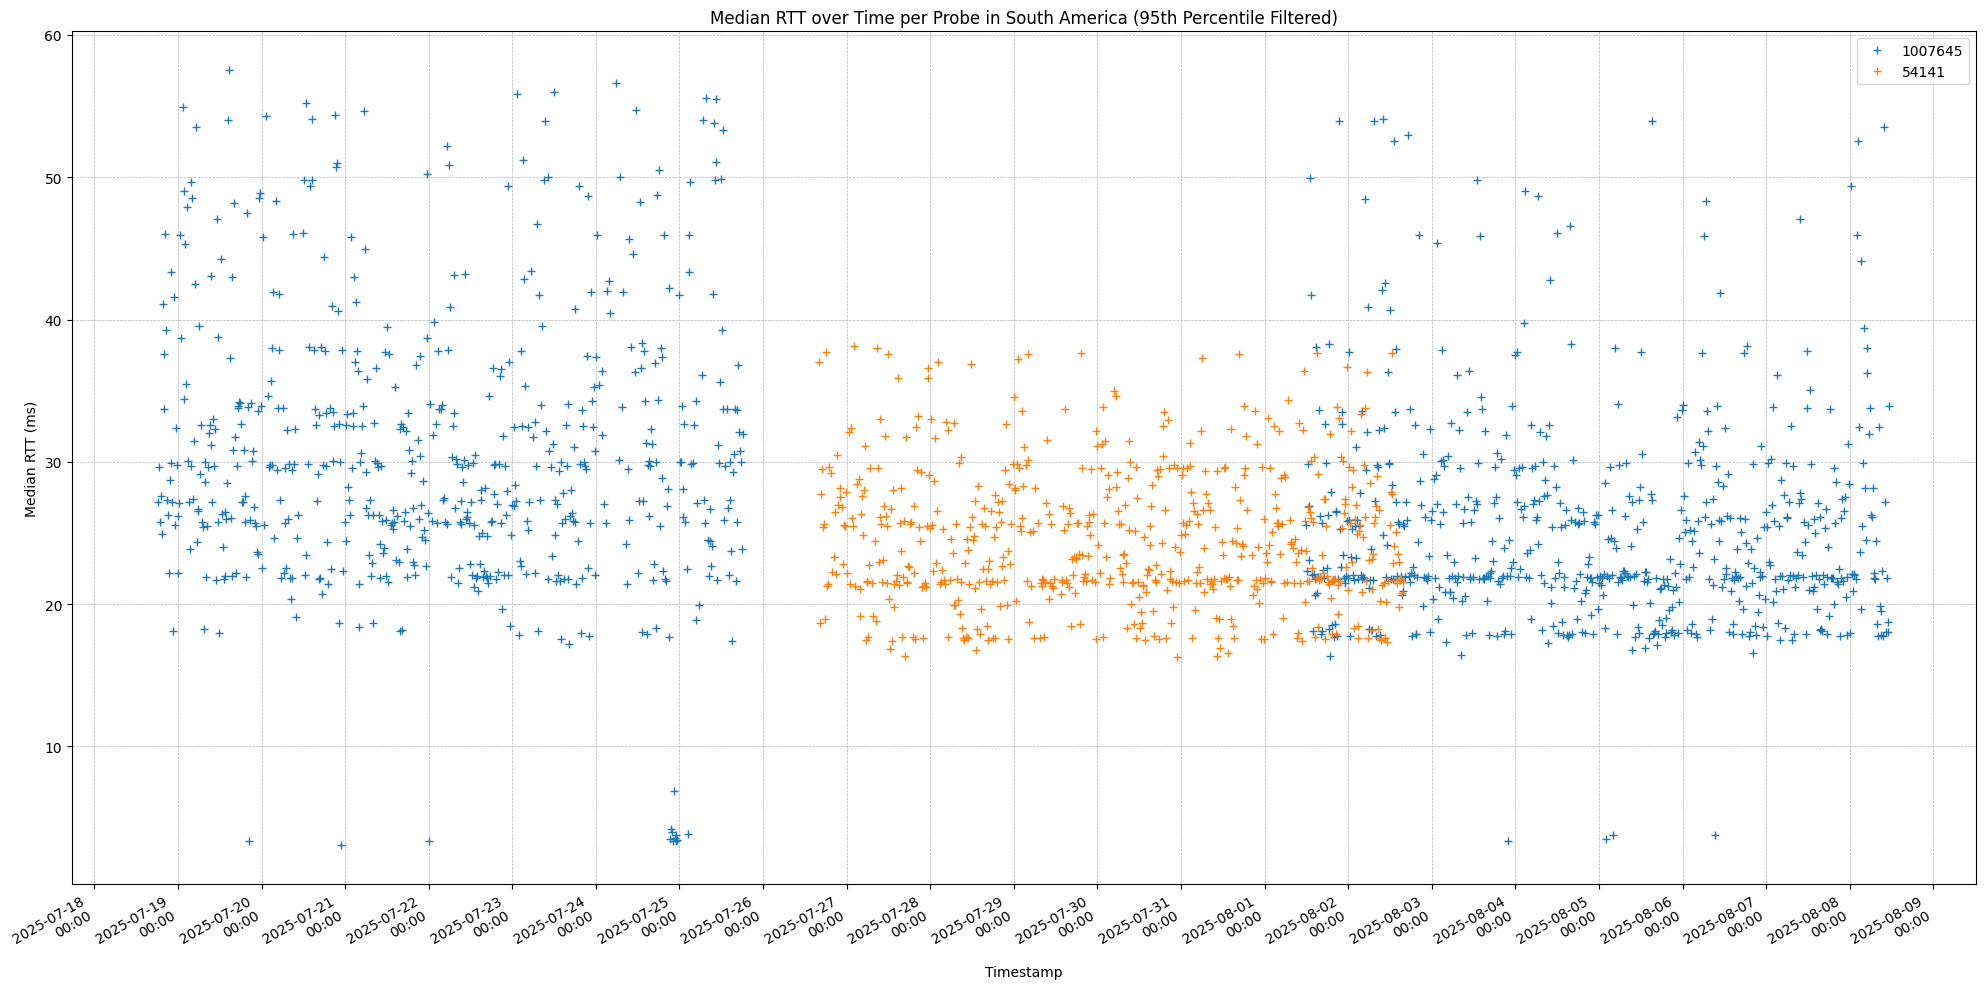

In [ ]:
for continent, info in continents.items():
    if not info["probe_ids"] or continent == "Unknown":
        continue

    has_data_to_plot = any(probe_time_series.get(probe_id) for probe_id in info["probe_ids"])

    if has_data_to_plot:
        fig, ax = plt.subplots(figsize=(20, 10))
        
        for probe_id in info["probe_ids"]:
            y = probe_time_series.get(probe_id, [])
            x = probe_time_stamps.get(probe_id, [])
            
            if y:
                p95 = np.percentile(y, 95)
                filtered_x = [xi for xi, yi in zip(x, y) if yi <= p95]
                filtered_y = [yi for yi in y if yi <= p95]
                if filtered_y:
                    ax.plot(filtered_x, filtered_y, '+', label=str(probe_id))

        ax.set_xlabel("Timestamp")
        ax.set_ylabel("Median Bent Pipe Latency (ms)")
        ax.set_title(f"Median Bent Pipe Latency over Time per Probe in {continent} (95th Percentile Filtered)")
        ax.legend()
        ax.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
        ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
        fig.autofmt_xdate()
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        fig.tight_layout()
        plt.show()
    else:
        print(f"No time series data available to plot for {continent}")

### Probe count per country

In [ ]:
import collections
import pycountry

country_list = []
for probe_id in probe_ids:
    country, _ = get_probe_location(probe_id)
    if country:
        country_list.append(country)

country_counts = collections.Counter(country_list)
sorted_country_counts = country_counts.most_common()

print(r"\begin{table}[H]")
print(r"\centering")
print(r"\begin{tabular}{ll}")
print(r"\textbf{Country} & \textbf{Probe Count} \\")
print(r"\hline")
for country_code, count in sorted_country_counts:
    try:
        country_name = pycountry.countries.get(alpha_2=country_code).name
    except AttributeError:
        country_name = country_code  # Fallback to code if not found
    print(f"{country_name} & {count} \\\\")
print(r"\end{tabular}")
print(r"\caption{Probe count per country.}")
print(r"\label{tab:probe_count_per_country}")
print(r"\end{table}")

\begin{table}[H]
\centering
\begin{tabular}{ll}
\textbf{Country} & \textbf{Probe Count} \\
\hline
United States & 5 \\
Canada & 3 \\
France & 2 \\
Philippines & 2 \\
Italy & 1 \\
Germany & 1 \\
United Kingdom & 1 \\
Haiti & 1 \\
Kiribati & 1 \\
Chile & 1 \\
Marshall Islands & 1 \\
Indonesia & 1 \\
Yemen & 1 \\
Madagascar & 1 \\
New Zealand & 1 \\
Colombia & 1 \\
\end{tabular}
\caption{Probe count per country.}
\label{tab:probe_count_per_country}
\end{table}


### Probe count per continent

In [ ]:
print(r"\begin{table}[H]")
print(r"\centering")
print(r"\begin{tabular}{ll}")
print(r"\textbf{Continent} & \textbf{Probe Count} \\")
print(r"\hline")
for continent, info in sorted(continents.items()):
    count = len(info["probe_ids"])
    if count > 0:
        print(f"{continent} & {count} \\\\")
print(r"\end{tabular}")
print(r"\caption{Probe count per continent.}")
print(r"\label{tab:probe_count_per_continent}")
print(r"\end{table}")

\begin{table}[H]
\centering
\begin{tabular}{ll}
\textbf{Continent} & \textbf{Probe Count} \\
\hline
Africa & 1 \\
Asia & 4 \\
Europe & 5 \\
North America & 9 \\
Oceania & 3 \\
South America & 2 \\
\end{tabular}
\caption{Probe count per continent.}
\label{tab:probe_count_per_continent}
\end{table}


## Bent Pipe Latency Distribution per Continent in the World

/tmp/ipykernel_156534/2045486134.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(plot_data, labels=plot_labels, flierprops=flierprops, patch_artist=True)


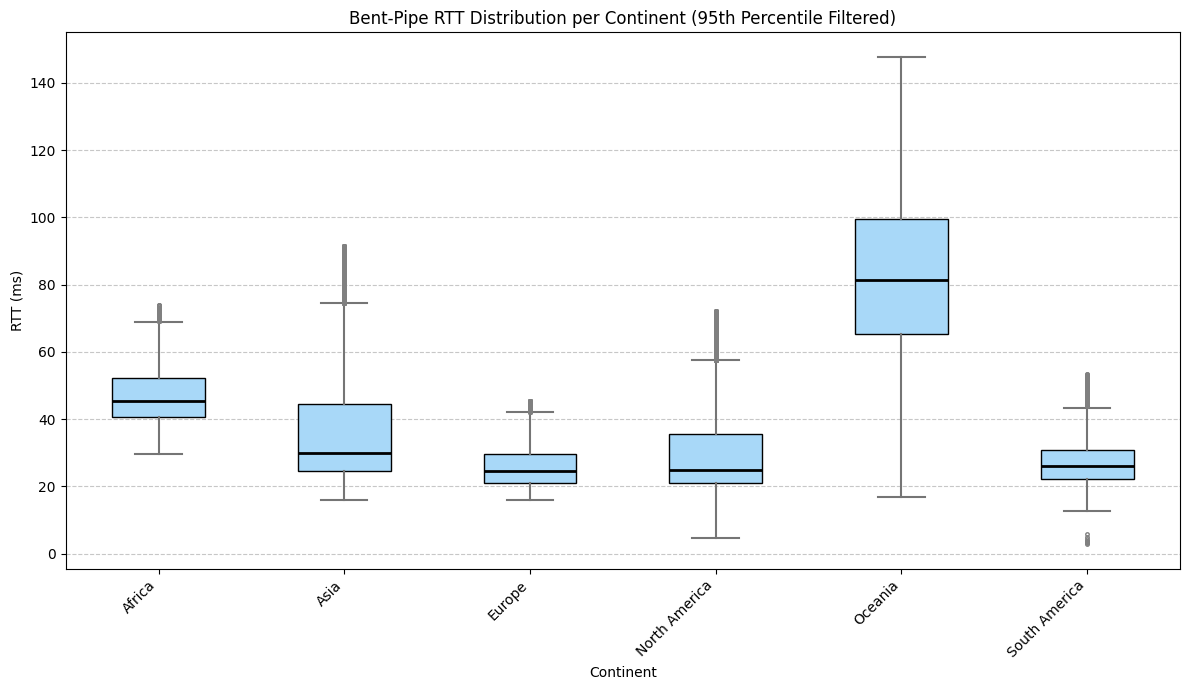

In [ ]:
import numpy as np

latencies_by_continent = {continent: [] for continent in continents if continent != "Unknown"}

for continent, info in continents.items():
    if continent == "Unknown" or not info["probe_ids"]:
        continue
    
    for probe_id in info["probe_ids"]:
        if probe_id in all_latencies_by_probe_id:
            latencies_by_continent[continent].extend(all_latencies_by_probe_id[probe_id])

plot_data = []
plot_labels = []
for continent, latencies in sorted(latencies_by_continent.items()):
    if latencies:
        p95 = np.percentile(latencies, 95)
        filtered_latencies = [l for l in latencies if l <= p95]
        if filtered_latencies:
            plot_data.append(filtered_latencies)
            plot_labels.append(continent)

if plot_data:
    fig, ax = plt.subplots(figsize=(12, 7))
    flierprops = dict(marker='.', markersize=5, linestyle='none', markeredgecolor='gray')
    
    bp = ax.boxplot(plot_data, labels=plot_labels, flierprops=flierprops, patch_artist=True)
    
    pastel_color = '#A8D8F8' 

    for patch in bp['boxes']:
        patch.set_facecolor(pastel_color)
    
    for whisker in bp['whiskers']:
        whisker.set(color='#757575', linewidth=1.5)

    for cap in bp['caps']:
        cap.set(color='#757575', linewidth=1.5)

    for median in bp['medians']:
        median.set(color='black', linewidth=2)

    ax.set_title('Bent-Pipe Latency Distribution per Continent (95th Percentile Filtered)')
    ax.set_xlabel('Continent')
    ax.set_ylabel('Bent Pipe Latency (ms)')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    plt.xticks(rotation=45, ha="right")
    fig.tight_layout()
    plt.show()
else:
    print("No latency data available to create the continent-based box plot.")

## Bent Pipe Latency Distribution per Country in North America

/tmp/ipykernel_156534/3557284125.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(plot_data_na, labels=plot_labels_na, flierprops=flierprops, patch_artist=True)


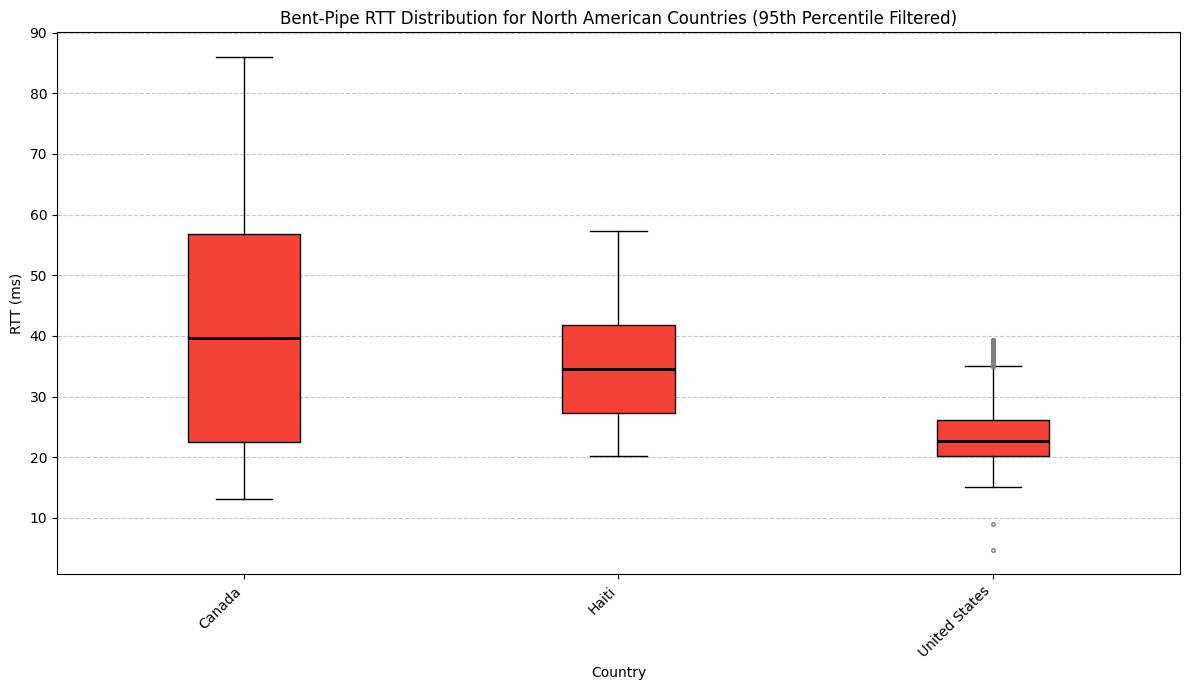

In [ ]:
import numpy as np
import pycountry

probe_locations_cache = {}
def get_cached_probe_location(probe_id):
    if probe_id not in probe_locations_cache:
        probe_locations_cache[probe_id] = get_probe_location(probe_id)
    return probe_locations_cache[probe_id]

latencies_by_country_na = {}
north_america_probe_ids = continents.get("North America", {}).get("probe_ids", [])

for probe_id in north_america_probe_ids:
    country_code, _ = get_cached_probe_location(probe_id)
    if country_code and probe_id in all_latencies_by_probe_id:
        if country_code not in latencies_by_country_na:
            latencies_by_country_na[country_code] = []
        latencies_by_country_na[country_code].extend(all_latencies_by_probe_id[probe_id])

plot_data_na = []
plot_labels_na = []
for country_code, latencies in sorted(latencies_by_country_na.items()):
    if latencies:
        p95 = np.percentile(latencies, 95)
        filtered_latencies = [l for l in latencies if l <= p95]
        if filtered_latencies:
            plot_data_na.append(filtered_latencies)
            try:
                country_name = pycountry.countries.get(alpha_2=country_code).name
            except AttributeError:
                country_name = country_code  
            plot_labels_na.append(country_name)

if plot_data_na:
    fig, ax = plt.subplots(figsize=(12, 7))
    flierprops = dict(marker='.', markersize=5, linestyle='none', markeredgecolor='gray')
    
    bp = ax.boxplot(plot_data_na, labels=plot_labels_na, flierprops=flierprops, patch_artist=True)
    
    na_color = continent_colors.get('North America', '#F44336')

    for patch in bp['boxes']:
        patch.set_facecolor(na_color)
    
    for median in bp['medians']:
        median.set(color='black', linewidth=2)

    ax.set_title('Bent-Pipe Latency Distribution for North American Countries (95th Percentile Filtered)')
    ax.set_xlabel('Country')
    ax.set_ylabel('Bent Pipe Latency (ms)')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    plt.xticks(rotation=45, ha="right")
    fig.tight_layout()
    plt.show()
else:
    print("No latency data available for North America to create the box plot.")

## Bent Pipe Latency Distribution per Country in Europe

/tmp/ipykernel_156534/2034652500.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(plot_data_eu, labels=plot_labels_eu, flierprops=flierprops, patch_artist=True)


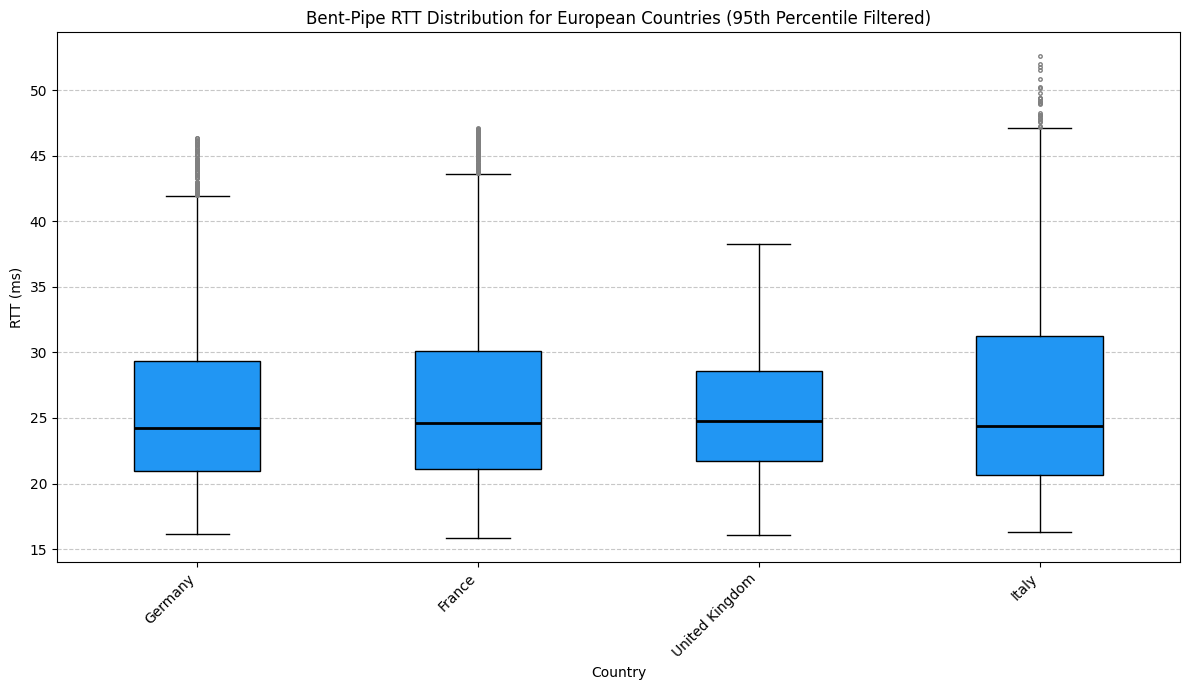

In [ ]:
import numpy as np
import pycountry

probe_locations_cache = {}
def get_cached_probe_location(probe_id):
    if probe_id not in probe_locations_cache:
        probe_locations_cache[probe_id] = get_probe_location(probe_id)
    return probe_locations_cache[probe_id]

latencies_by_country_eu = {}
europe_probe_ids = continents.get("Europe", {}).get("probe_ids", [])

for probe_id in europe_probe_ids:
    country_code, _ = get_cached_probe_location(probe_id)
    if country_code and probe_id in all_latencies_by_probe_id:
        if country_code not in latencies_by_country_eu:
            latencies_by_country_eu[country_code] = []
        latencies_by_country_eu[country_code].extend(all_latencies_by_probe_id[probe_id])

plot_data_eu = []
plot_labels_eu = []
for country_code, latencies in sorted(latencies_by_country_eu.items()):
    if latencies:
        p95 = np.percentile(latencies, 95)
        filtered_latencies = [l for l in latencies if l <= p95]
        if filtered_latencies:
            plot_data_eu.append(filtered_latencies)
            try:
                country_name = pycountry.countries.get(alpha_2=country_code).name
            except AttributeError:
                country_name = country_code  
            plot_labels_eu.append(country_name)

if plot_data_eu:
    fig, ax = plt.subplots(figsize=(12, 7))
    flierprops = dict(marker='.', markersize=5, linestyle='none', markeredgecolor='gray')
    
    bp = ax.boxplot(plot_data_eu, labels=plot_labels_eu, flierprops=flierprops, patch_artist=True)

    eu_color = continent_colors.get('Europe', '#2196F3')

    for patch in bp['boxes']:
        patch.set_facecolor(eu_color)

    for median in bp['medians']:
        median.set(color='black', linewidth=2)

    ax.set_title('Bent-Pipe Latency Distribution for European Countries (95th Percentile Filtered)')
    ax.set_xlabel('Country')
    ax.set_ylabel('Bent Pipe Latency (ms)')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    plt.xticks(rotation=45, ha="right")
    fig.tight_layout()
    plt.show()
else:
    print("No latency data available for Europe to create the box plot.")

## Bent Pipe Latency Distribution per Country in North America and Europe

/tmp/ipykernel_156534/1936467410.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(plot_data_combined, labels=plot_labels_combined, flierprops=flierprops, patch_artist=True)


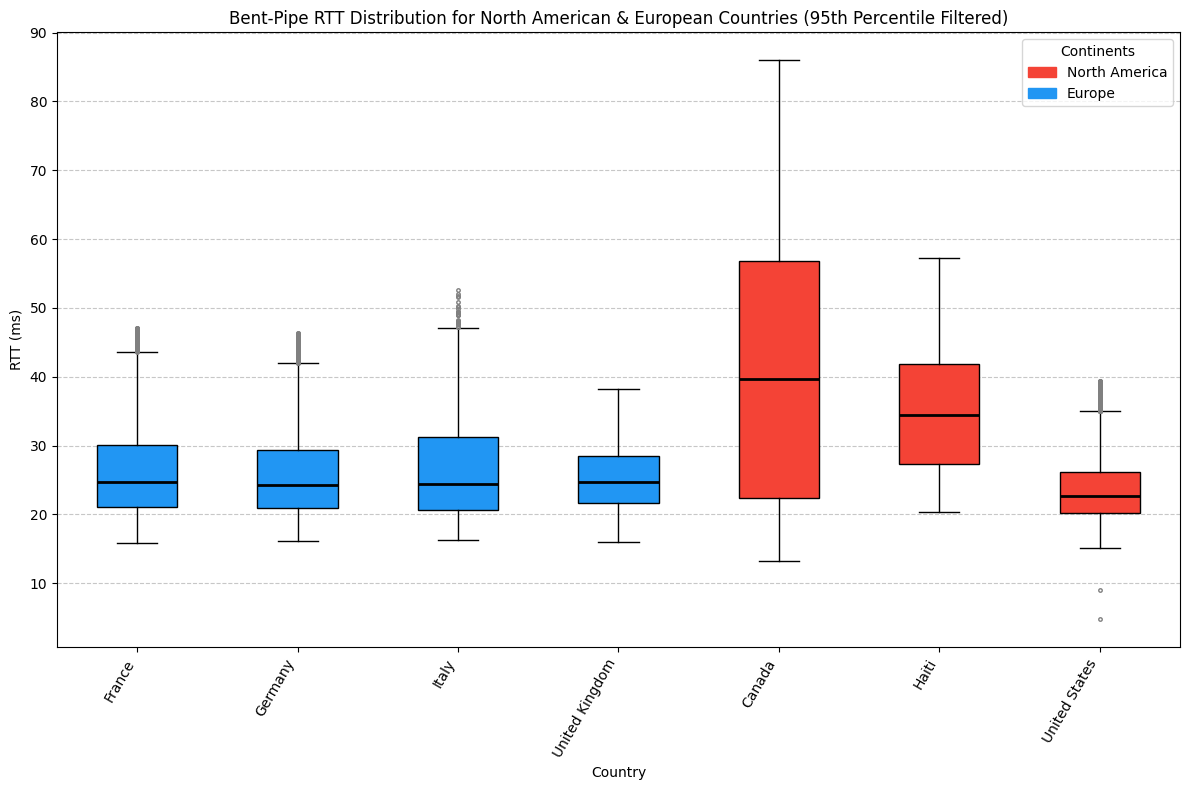

In [ ]:
import numpy as np
import pycountry
import matplotlib.patches as mpatches

latencies_by_country_combined = {}
country_to_continent_map = {}

na_probes = continents.get("North America", {}).get("probe_ids", [])
eu_probes = continents.get("Europe", {}).get("probe_ids", [])
combined_probes = na_probes + eu_probes

for probe_id in combined_probes:
    country_code, continent = get_cached_probe_location(probe_id)
    if country_code and probe_id in all_latencies_by_probe_id:
        if country_code not in latencies_by_country_combined:
            latencies_by_country_combined[country_code] = []
            country_to_continent_map[country_code] = continent
        latencies_by_country_combined[country_code].extend(all_latencies_by_probe_id[probe_id])

plot_data_combined = []
plot_labels_combined = []
sorted_countries = sorted(
    latencies_by_country_combined.keys(), 
    key=lambda cc: (
        country_to_continent_map.get(cc, 'ZZZ'),  
        pycountry.countries.get(alpha_2=cc).name if pycountry.countries.get(alpha_2=cc) else cc  
    )
)

for country_code in sorted_countries:
    latencies = latencies_by_country_combined[country_code]
    if latencies:
        p95 = np.percentile(latencies, 95)
        filtered_latencies = [l for l in latencies if l <= p95]
        if filtered_latencies:
            plot_data_combined.append(filtered_latencies)
            try:
                country_name = pycountry.countries.get(alpha_2=country_code).name
            except AttributeError:
                country_name = country_code
            plot_labels_combined.append(country_name)

if plot_data_combined:
    fig, ax = plt.subplots(figsize=(12, 8))
    flierprops = dict(marker='.', markersize=5, linestyle='none', markeredgecolor='gray')
    
    bp = ax.boxplot(plot_data_combined, labels=plot_labels_combined, flierprops=flierprops, patch_artist=True)

    for i, patch in enumerate(bp['boxes']):
        country_name = plot_labels_combined[i]
        country_code = ''
        try:
            country_code = pycountry.countries.get(name=country_name).alpha_2
        except (AttributeError, KeyError):
             for code, name in [(c, pycountry.countries.get(alpha_2=c).name if pycountry.countries.get(alpha_2=c) else c) for c in sorted_countries]:
                if name == country_name:
                    country_code = code
                    break
        
        continent = country_to_continent_map.get(country_code, "Unknown")
        color = continent_colors.get(continent, '#BDBDBD')
        patch.set_facecolor(color)

    for median in bp['medians']:
        median.set(color='black', linewidth=2)

    legend_patches = [
        mpatches.Patch(color=continent_colors['North America'], label='North America'),
        mpatches.Patch(color=continent_colors['Europe'], label='Europe')
    ]
    ax.legend(handles=legend_patches, title='Continents')

    ax.set_title('Bent-Pipe Latency Distribution for North American & European Countries (95th Percentile Filtered)')
    ax.set_xlabel('Country')
    ax.set_ylabel('Bent Pipe Latency (ms)')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    plt.xticks(rotation=60, ha="right")
    fig.tight_layout()
    plt.show()
else:
    print("No latency data available for North America or Europe to create the box plot.")

## CDF of Bent-Pipe Latencies per Continent

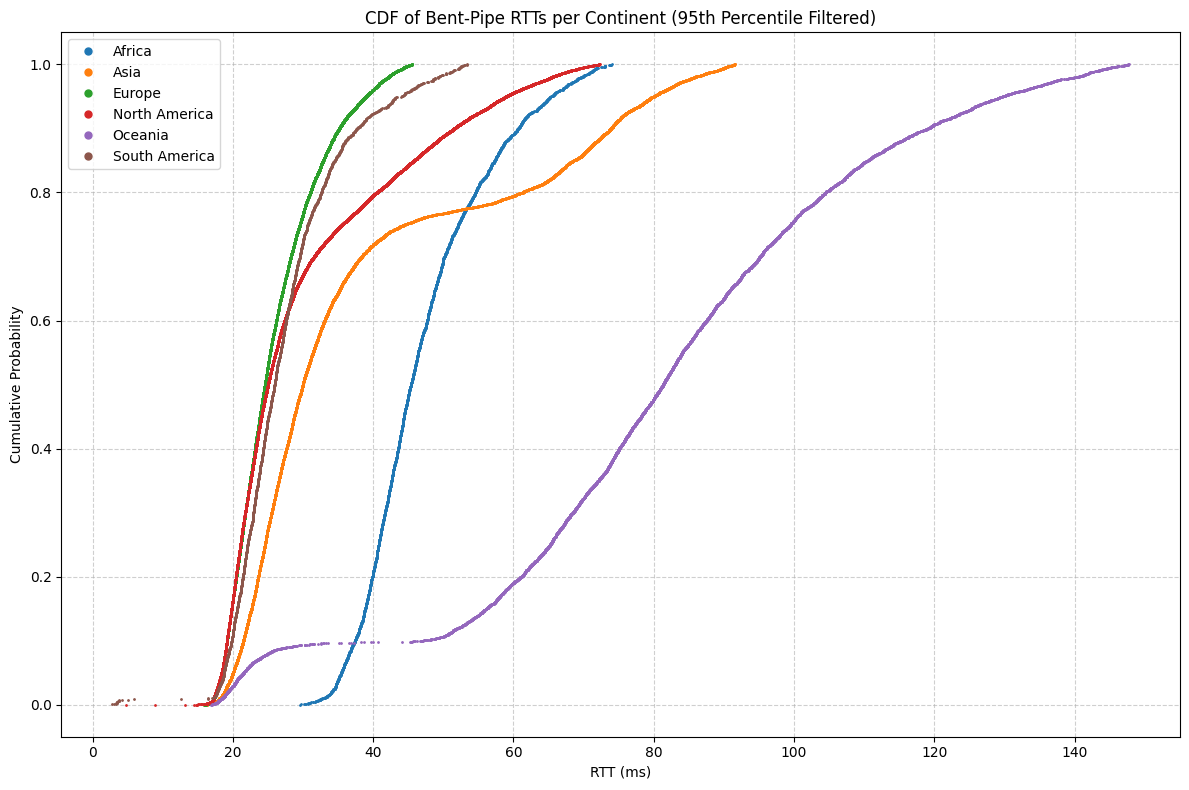

In [ ]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 8))

for continent, latencies in sorted(latencies_by_continent.items()):
    if latencies:
        p95 = np.percentile(latencies, 95)
        filtered_latencies = sorted([l for l in latencies if l <= p95])
        
        if filtered_latencies:
            cdf = np.arange(1, len(filtered_latencies) + 1) / len(filtered_latencies)
            
            ax.plot(filtered_latencies, cdf, marker='.', linestyle='none', ms=2, label=continent)

ax.set_title('CDF of Bent-Pipe Latencies per Continent (95th Percentile Filtered)')
ax.set_xlabel('Bent Pipe Latency (ms)')
ax.set_ylabel('Cumulative Probability')
ax.grid(True, which='both', linestyle='--', alpha=0.6)
ax.legend(loc='best', markerscale=5) 
fig.tight_layout()
plt.show()

## CDF of Bent-Pipe Latencies per Country in North America and Europe

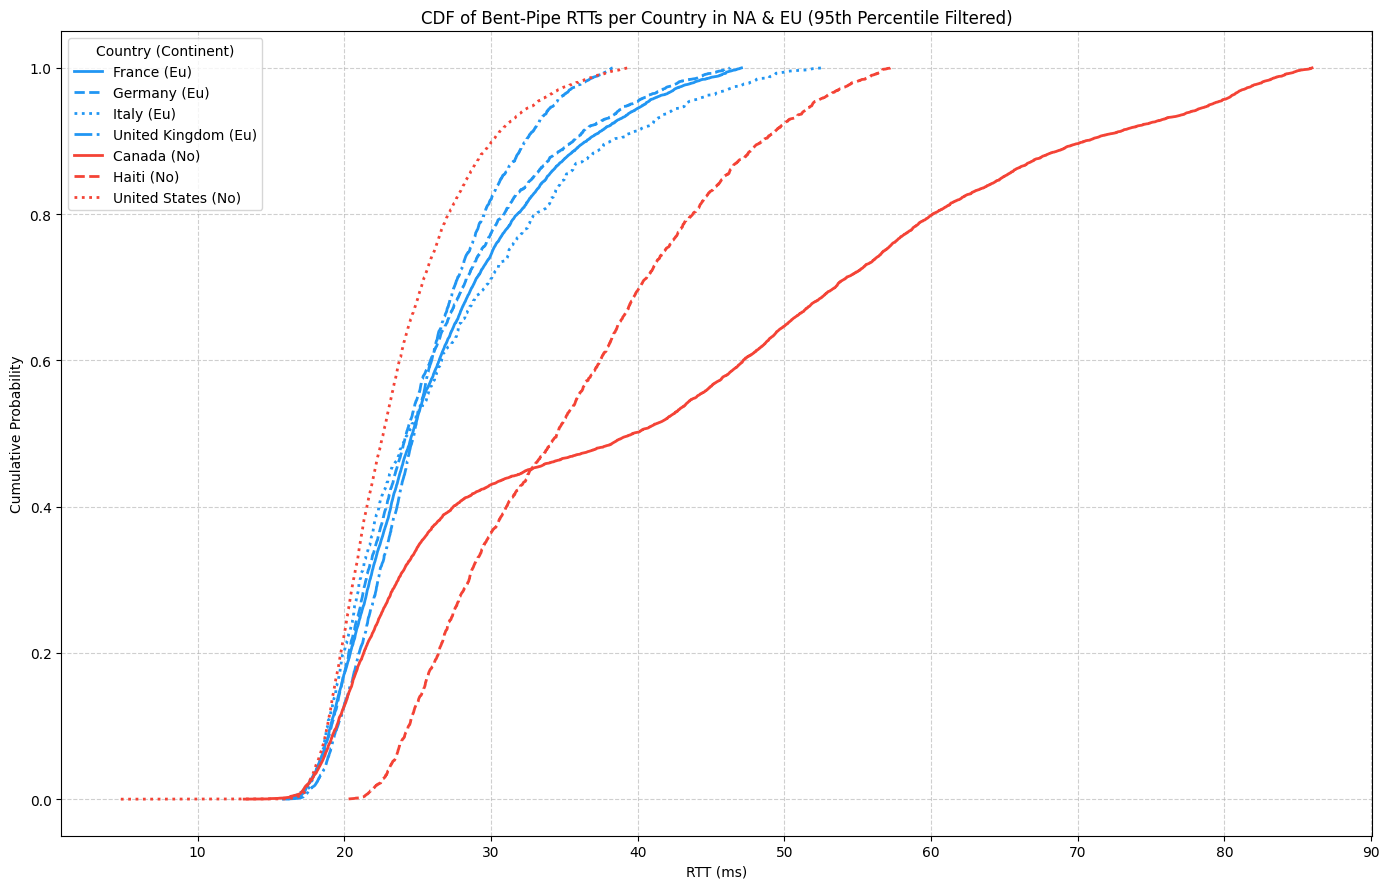

In [ ]:
import numpy as np
import pycountry
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(14, 9))

line_styles = ['-', '--', ':', '-.']
style_counters = {
    'North America': 0,
    'Europe': 0
}

for country_code in sorted_countries:
    latencies = latencies_by_country_combined.get(country_code, [])
    continent = country_to_continent_map.get(country_code)
    
    if latencies and continent in ['North America', 'Europe']:
        p95 = np.percentile(latencies, 95)
        filtered_latencies = sorted([l for l in latencies if l <= p95])
        
        if filtered_latencies:
            cdf = np.arange(1, len(filtered_latencies) + 1) / len(filtered_latencies)
            
            try:
                country_name = pycountry.countries.get(alpha_2=country_code).name
            except AttributeError:
                country_name = country_code
            
            color = continent_colors.get(continent, '#BDBDBD')
            
            style_idx = style_counters[continent]
            style = line_styles[style_idx % len(line_styles)]
            style_counters[continent] += 1
            
            ax.plot(filtered_latencies, cdf, label=f"{country_name} ({continent[:2]})", color=color, linestyle=style, linewidth=2)

ax.set_title('CDF of Bent-Pipe Latencies per Country in NA & EU (95th Percentile Filtered)')
ax.set_xlabel('Bent Pipe Latency (ms)')
ax.set_ylabel('Cumulative Probability')
ax.grid(True, which='both', linestyle='--', alpha=0.6)
ax.legend(loc='best', title='Country (Continent)')
fig.tight_layout()
plt.show()

## Failure Rates per Continent

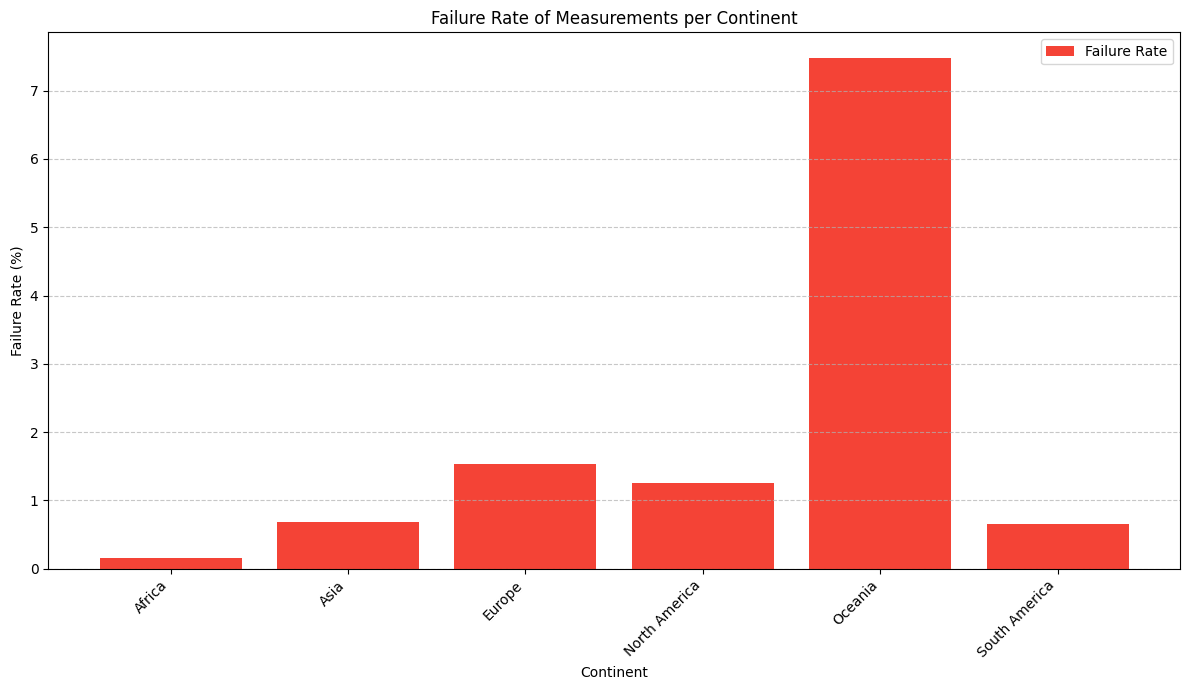

In [ ]:
continent_stats = {continent: {'successful': 0, 'unsuccessful': 0} for continent in continents if continent != "Unknown"}

for continent, info in continents.items():
    if continent == "Unknown" or not info["probe_ids"]:
        continue
    
    for probe_id in info["probe_ids"]:
        if probe_id in measurements_by_probe_id:
            for m in measurements_by_probe_id[probe_id]:
                if m.reached_target:
                    continent_stats[continent]['successful'] += 1
                else:
                    continent_stats[continent]['unsuccessful'] += 1

labels = []
failure_rates = []

for continent, stats in sorted(continent_stats.items()):
    total = stats['successful'] + stats['unsuccessful']
    if total > 0:
        labels.append(continent)
        failure_rates.append((stats['unsuccessful'] / total) * 100)

if labels:
    fig, ax = plt.subplots(figsize=(12, 7))
    
    ax.bar(labels, failure_rates, label='Failure Rate', color='#F44336')
    
    ax.set_xlabel('Continent')
    ax.set_ylabel('Failure Rate (%)')
    ax.set_title('Failure Rate of Measurements per Continent')
    ax.legend()
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    plt.xticks(rotation=45, ha="right")
    fig.tight_layout()
    plt.show()
else:
    print("No data available to create the failure rate bar chart.")

## Top 3 Worst Countries w.r.t. Bent Pipe Latencies

/tmp/ipykernel_156534/32239201.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(plot_data_top3, labels=plot_labels_top3, flierprops=flierprops, patch_artist=True)


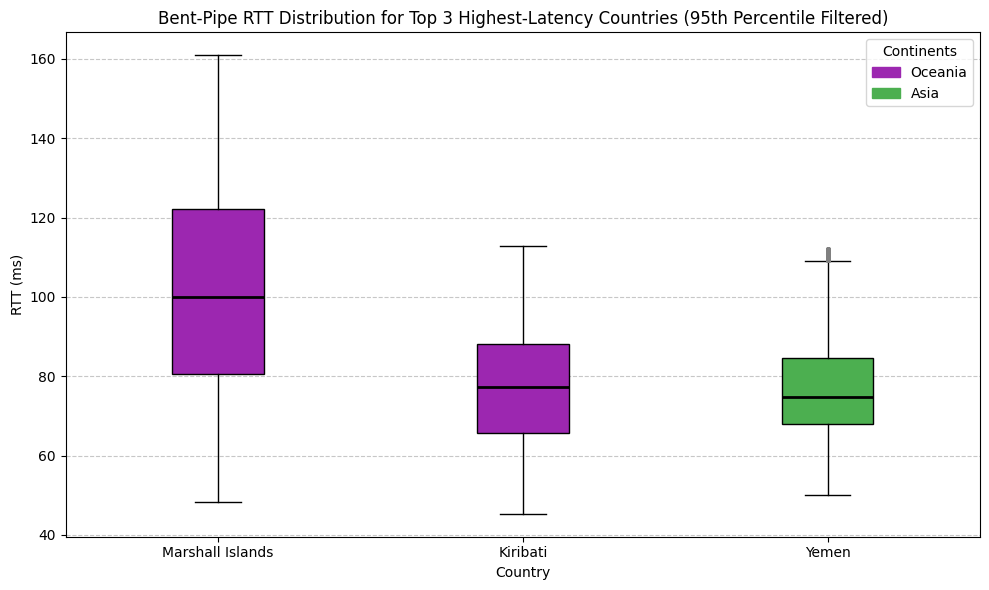

In [ ]:
import numpy as np
import pycountry
import matplotlib.patches as mpatches

latencies_by_country_all = {}
country_to_continent_map_all = {}

for probe_id, latencies in all_latencies_by_probe_id.items():
    country_code, continent = get_cached_probe_location(probe_id)
    if country_code and continent:
        if country_code not in latencies_by_country_all:
            latencies_by_country_all[country_code] = []
            country_to_continent_map_all[country_code] = continent
        latencies_by_country_all[country_code].extend(latencies)

median_rtts_by_country = {
    country: np.median(latencies)
    for country, latencies in latencies_by_country_all.items() if latencies
}

top_3_country_codes = sorted(median_rtts_by_country, key=median_rtts_by_country.get, reverse=True)[:3]

plot_data_top3 = []
plot_labels_top3 = []
for country_code in top_3_country_codes:
    latencies = latencies_by_country_all.get(country_code, [])
    if latencies:
        p95 = np.percentile(latencies, 95)
        filtered_latencies = [l for l in latencies if l <= p95]
        if filtered_latencies:
            plot_data_top3.append(filtered_latencies)
            try:
                country_name = pycountry.countries.get(alpha_2=country_code).name
            except AttributeError:
                country_name = country_code
            plot_labels_top3.append(country_name)

if plot_data_top3:
    fig, ax = plt.subplots(figsize=(10, 6))
    flierprops = dict(marker='.', markersize=5, linestyle='none', markeredgecolor='gray')
    
    bp = ax.boxplot(plot_data_top3, labels=plot_labels_top3, flierprops=flierprops, patch_artist=True)

    for i, patch in enumerate(bp['boxes']):
        country_code = top_3_country_codes[i]
        continent = country_to_continent_map_all.get(country_code, "Unknown")
        color = continent_colors.get(continent, '#BDBDBD')
        patch.set_facecolor(color)

    for median in bp['medians']:
        median.set(color='black', linewidth=2)

    continents_in_plot = {country_to_continent_map_all.get(cc) for cc in top_3_country_codes}
    legend_patches = [
        mpatches.Patch(color=continent_colors[cont], label=cont)
        for cont in continents_in_plot if cont in continent_colors
    ]
    ax.legend(handles=legend_patches, title='Continents')

    ax.set_title('Bent-Pipe RTT Distribution for Top 3 Highest-Latency Countries (95th Percentile Filtered)')
    ax.set_xlabel('Country')
    ax.set_ylabel('RTT (ms)')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    fig.tight_layout()
    plt.show()
else:
    print("Could not generate plot for top 3 latency countries.")

## Top 3 Worst Countries w.r.t. Failure Rates

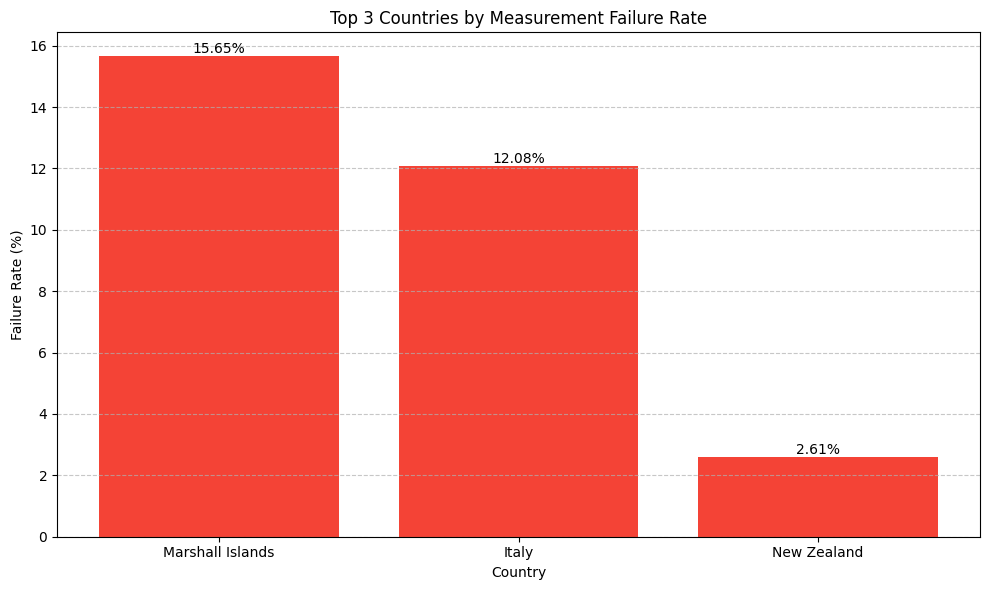

In [ ]:
import pycountry

country_stats = {}
for probe_id, probe_measurements in measurements_by_probe_id.items():
    country_code, _ = get_cached_probe_location(probe_id)
    if country_code:
        if country_code not in country_stats:
            country_stats[country_code] = {'successful': 0, 'unsuccessful': 0}
        
        successful_count = sum(1 for m in probe_measurements if m.reached_target)
        unsuccessful_count = len(probe_measurements) - successful_count
        
        country_stats[country_code]['successful'] += successful_count
        country_stats[country_code]['unsuccessful'] += unsuccessful_count

failure_rates_by_country = {}
for country_code, stats in country_stats.items():
    total = stats['successful'] + stats['unsuccessful']
    if total > 0:
        failure_rate = (stats['unsuccessful'] / total) * 100
        failure_rates_by_country[country_code] = failure_rate

top_3_failure_countries = sorted(failure_rates_by_country, key=failure_rates_by_country.get, reverse=True)[:3]

plot_labels_top3_failure = []
plot_rates_top3_failure = []
for country_code in top_3_failure_countries:
    try:
        country_name = pycountry.countries.get(alpha_2=country_code).name
    except AttributeError:
        country_name = country_code
    plot_labels_top3_failure.append(country_name)
    plot_rates_top3_failure.append(failure_rates_by_country[country_code])

if plot_labels_top3_failure:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    bars = ax.bar(plot_labels_top3_failure, plot_rates_top3_failure, color='#F44336')
    
    ax.set_xlabel('Country')
    ax.set_ylabel('Failure Rate (%)')
    ax.set_title('Top 3 Countries by Measurement Failure Rate')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', va='bottom', ha='center')

    fig.tight_layout()
    plt.show()
else:
    print("No data available to create the failure rate bar chart for top countries.")

In [ ]:
import numpy as np
import statistics
import matplotlib.pyplot as plt

latencies_by_target = {target_ip: [] for target_ip in measurement_info.values()}

for msm_id, target_ip in measurement_info.items():
    measurement_file = os.path.join(measurements_dir, f"{msm_id}.txt")
    if not os.path.exists(measurement_file):
        continue

    measurements_from_file = parse.parse_measurements(measurement_file, target_ip)

    for measurement in measurements_from_file:
        if not measurement.reached_target:
            continue

        latency = None

        gateway_hop_found = False
        for hop in measurement.hops:
            if hop.ip == gateway_ip and hop.rtt_times_ms:
                latency = statistics.mean(hop.rtt_times_ms)
                gateway_hop_found = True
                break
        
        if not gateway_hop_found:
            first_star_found = False
            for hop in measurement.hops:
                if hop.ip == '*':
                    first_star_found = True
                elif first_star_found and hop.ip != '*' and hop.rtt_times_ms:
                    latency = statistics.mean(hop.rtt_times_ms)
                    break
        
        if latency is not None:
            latencies_by_target[target_ip].append(latency)

# Target Based Analysis

In this section we aggregated the data w.r.t. to the target IP rather than probe geolocation. The plots are similar to their counterparts in the geolocation based analysis.

## Bent Pipe Latency Distribution per Target

/tmp/ipykernel_156534/999237602.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(plot_data, labels=plot_labels, flierprops=flierprops, patch_artist=True)


Text(0.5, 1.0, 'Bent-Pipe RTT Distribution per Target DNS IP (95th Percentile Filtered)')

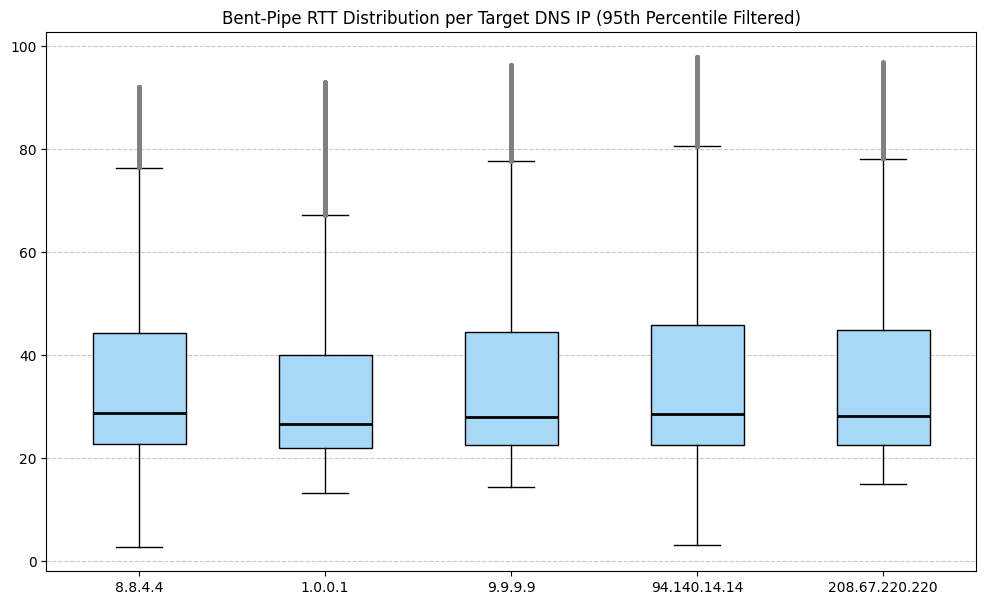

In [ ]:
plot_data = []
plot_labels = []
for target_ip, latencies in latencies_by_target.items():
    if latencies:
        p95 = np.percentile(latencies, 95)
        filtered_latencies = [l for l in latencies if l <= p95]
        if filtered_latencies:
            plot_data.append(filtered_latencies)
            plot_labels.append(target_ip)

if plot_data:
    fig, ax = plt.subplots(figsize=(12, 7))
    flierprops = dict(marker='.', markersize=5, linestyle='none', markeredgecolor='gray')
    
    bp = ax.boxplot(plot_data, labels=plot_labels, flierprops=flierprops, patch_artist=True)
    
    box_color = '#A8D8F8'  

    for patch in bp['boxes']:
        patch.set_facecolor(box_color)
    
    for median in bp['medians']:
        median.set(color='black', linewidth=2)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)

ax.set_title('Bent-Pipe RTT Distribution per Target DNS IP (95th Percentile Filtered)')

## Bent Pipe Latency CDF Distribution per Target

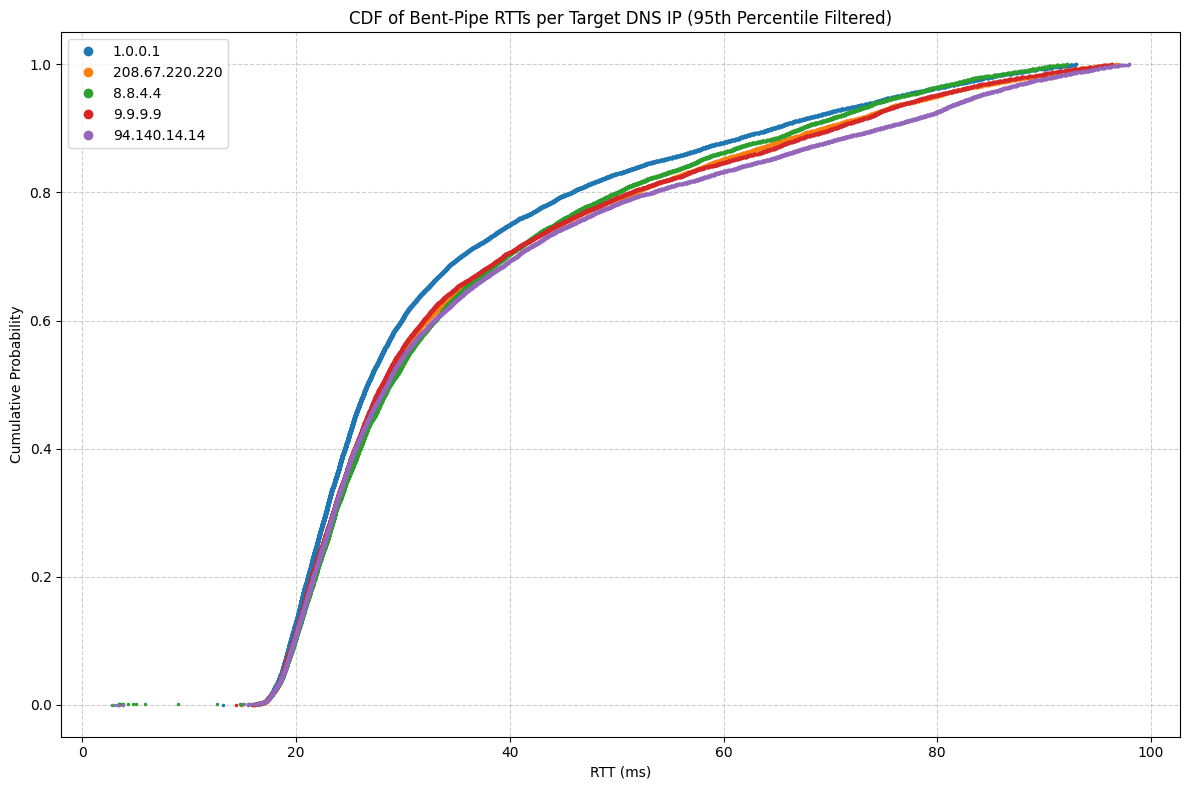

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

for target_ip, latencies in sorted(latencies_by_target.items()):
    if latencies:
        p95 = np.percentile(latencies, 95)
        filtered_latencies = sorted([l for l in latencies if l <= p95])
        
        if filtered_latencies:
            cdf = np.arange(1, len(filtered_latencies) + 1) / len(filtered_latencies)
            
            ax.plot(filtered_latencies, cdf, marker='.', linestyle='none', ms=3, label=target_ip)

ax.set_title('CDF of Bent-Pipe RTTs per Target DNS IP (95th Percentile Filtered)')
ax.set_xlabel('RTT (ms)')
ax.set_ylabel('Cumulative Probability')
ax.grid(True, which='both', linestyle='--', alpha=0.6)
ax.legend(loc='best', markerscale=4) 
fig.tight_layout()
plt.show()

## Failure Rate per Target

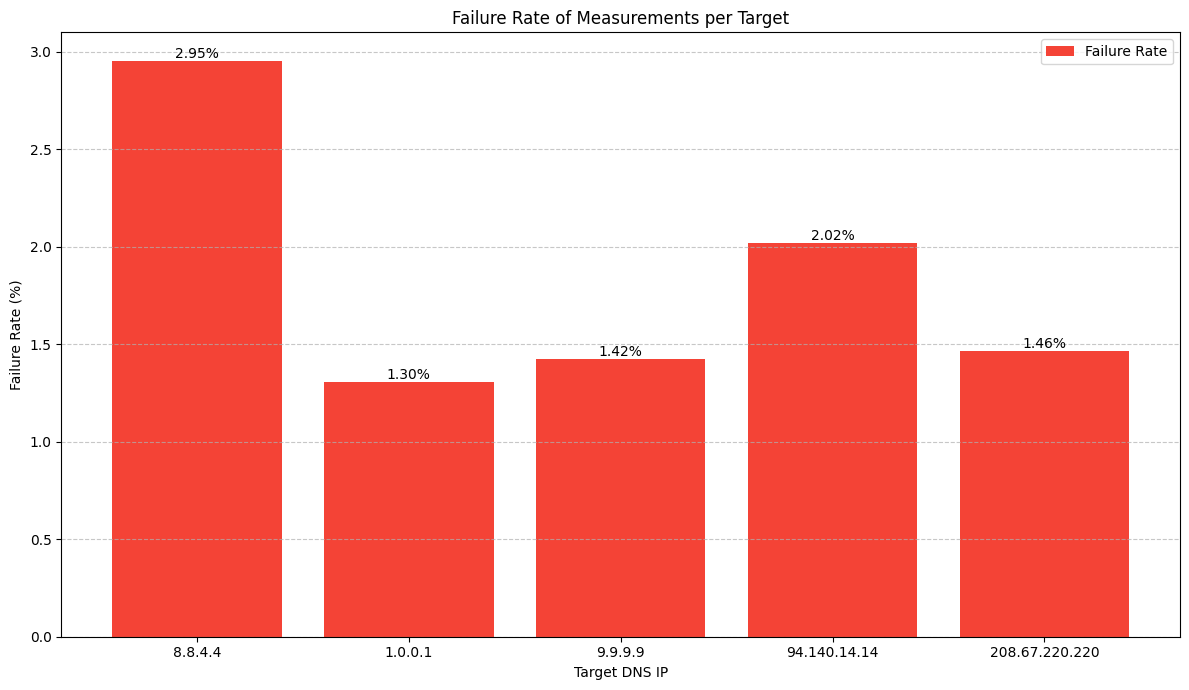

In [ ]:
import matplotlib.pyplot as plt

target_stats = {ip: {'successful': 0, 'unsuccessful': 0} for ip in measurement_info.values()}

for msm_id, target_ip in measurement_info.items():
    measurement_file = os.path.join(measurements_dir, f"{msm_id}.txt")
    if not os.path.exists(measurement_file):
        continue
    
    measurements_from_file = parse.parse_measurements(measurement_file, target_ip)
    
    for m in measurements_from_file:
        if m.reached_target:
            target_stats[target_ip]['successful'] += 1
        else:
            target_stats[target_ip]['unsuccessful'] += 1

target_labels = list(measurement_info.values())
failure_rates = []

for ip in target_labels:
    stats = target_stats.get(ip, {'successful': 0, 'unsuccessful': 0})
    total = stats['successful'] + stats['unsuccessful']
    if total > 0:
        failure_rates.append((stats['unsuccessful'] / total) * 100)
    else:
        failure_rates.append(0) 

if target_labels:
    fig, ax = plt.subplots(figsize=(12, 7))
    
    bars = ax.bar(target_labels, failure_rates, label='Failure Rate', color='#F44336')
    
    ax.set_xlabel('Target DNS IP')
    ax.set_ylabel('Failure Rate (%)')
    ax.set_title('Failure Rate of Measurements per Target')
    ax.legend()
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', va='bottom', ha='center')

    fig.tight_layout()
    plt.show()
else:
    print("No data available to create the failure rate bar chart.")

## Median Bent-Pipe Latency over Time per Target

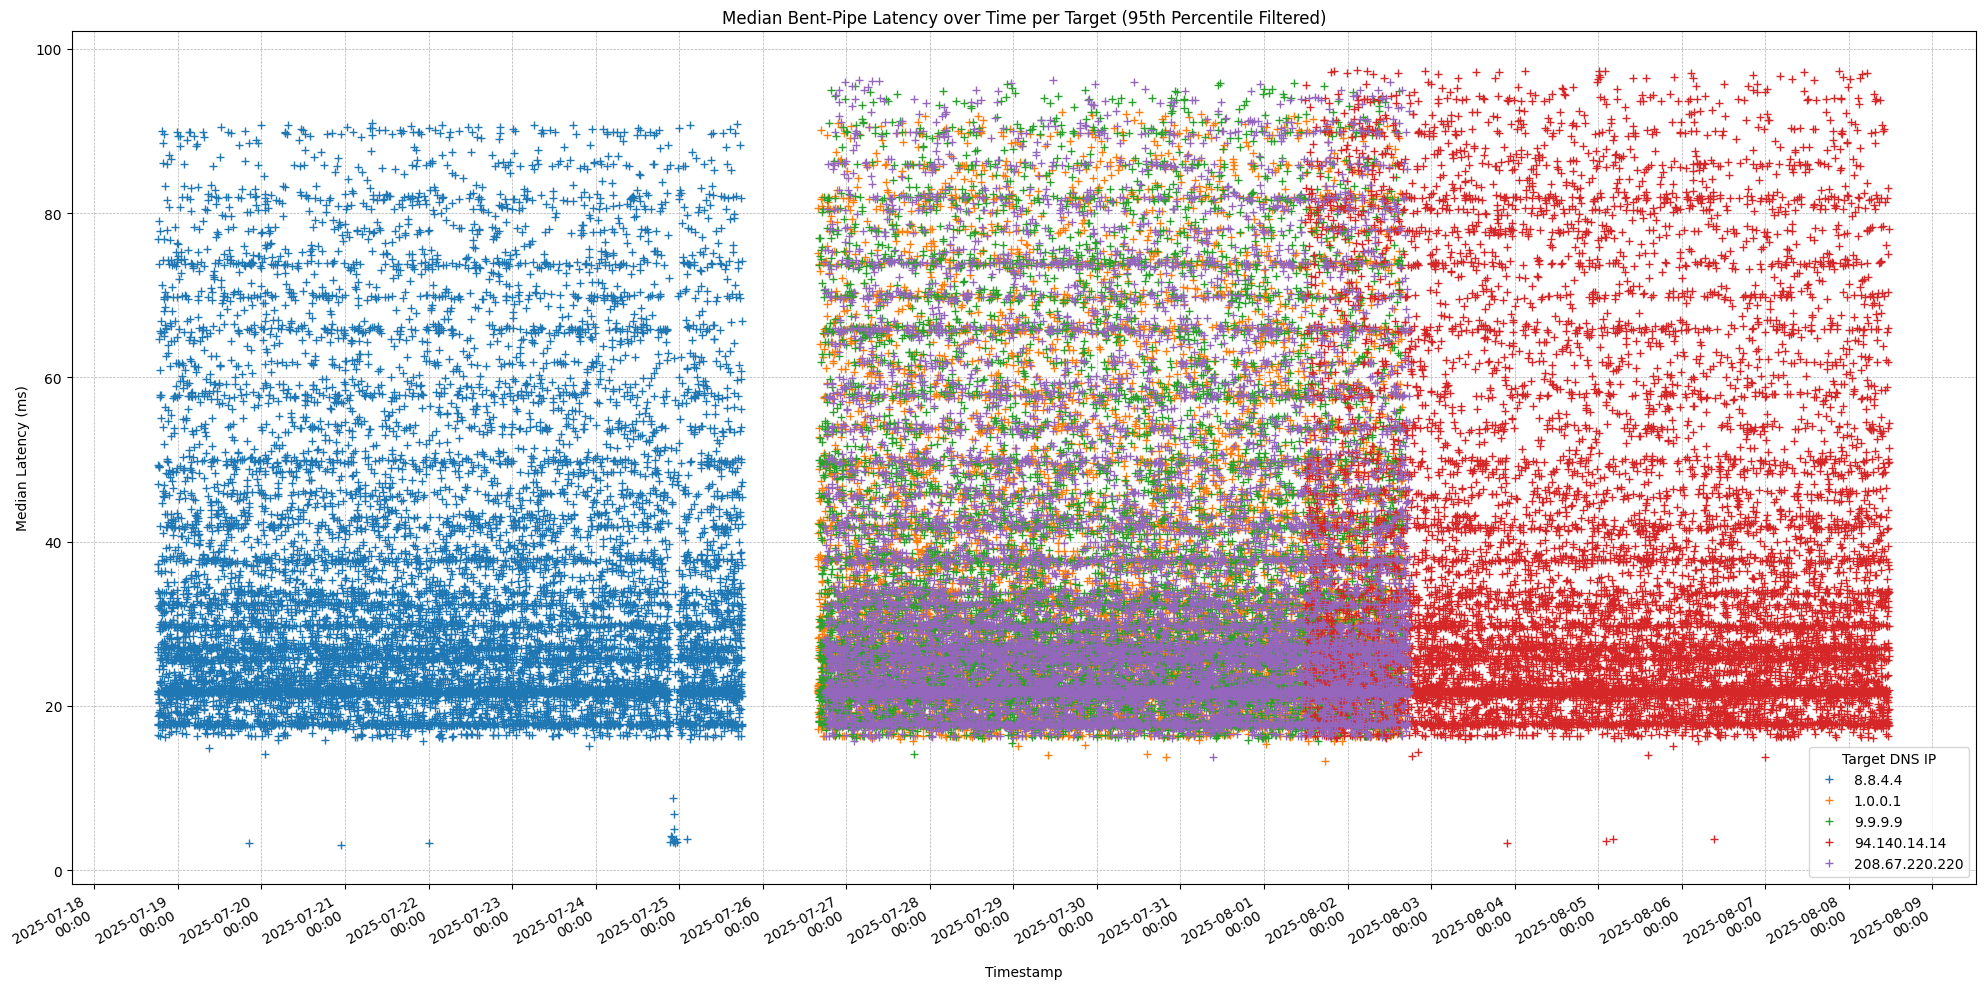

In [ ]:
import numpy as np
import datetime
from matplotlib.dates import DateFormatter, AutoDateLocator

target_time_series = {target_ip: [] for target_ip in measurement_info.values()}
target_time_stamps = {target_ip: [] for target_ip in measurement_info.values()}

for measurement in successful_measurements:
    target_ip = measurement.target_ip
    latency = None
    
    gateway_hop_found = False
    for hop in measurement.hops:
        if hop.ip == gateway_ip and hop.rtt_times_ms:
            latency = statistics.median(hop.rtt_times_ms)
            gateway_hop_found = True
            break
    
    if not gateway_hop_found:
        first_star_found = False
        for hop in measurement.hops:
            if hop.ip == '*':
                first_star_found = True
            elif first_star_found and hop.ip != '*' and hop.rtt_times_ms:
                latency = statistics.median(hop.rtt_times_ms)
                break
    
    if latency is not None:
        target_time_series[target_ip].append(latency)
        target_time_stamps[target_ip].append(datetime.datetime.fromtimestamp(measurement.timestamp))

fig, ax = plt.subplots(figsize=(20, 10))

for target_ip in measurement_info.values():
    y = target_time_series.get(target_ip, [])
    x = target_time_stamps.get(target_ip, [])
    
    if y and x:
        sorted_points = sorted(zip(x, y))
        sorted_x, sorted_y = zip(*sorted_points)
        
        p95 = np.percentile(sorted_y, 95)
        filtered_x = [xi for xi, yi in zip(sorted_x, sorted_y) if yi <= p95]
        filtered_y = [yi for yi in sorted_y if yi <= p95]
        
        if filtered_y:
            ax.plot(filtered_x, filtered_y, '+', label=target_ip)

ax.set_xlabel("Timestamp")
ax.set_ylabel("Median Latency (ms)")
ax.set_title("Median Bent-Pipe Latency over Time per Target (95th Percentile Filtered)")
ax.legend(title="Target DNS IP")

ax.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
fig.autofmt_xdate()

ax.grid(True, which='both', linestyle='--', linewidth=0.5)
fig.tight_layout()

## Fluke Data Points

In [ ]:
low_rtt_threshold = 5

low_rtt_measurements = []

for measurement in successful_measurements:
    if measurement.target_ip != "8.8.4.4":
        continue

    latency = None
    
    gateway_hop_found = False
    for hop in measurement.hops:
        if hop.ip == gateway_ip and hop.rtt_times_ms:
            latency = statistics.median(hop.rtt_times_ms)
            gateway_hop_found = True
            break
    
    if not gateway_hop_found:
        first_star_found = False
        for hop in measurement.hops:
            if hop.ip == '*':
                first_star_found = True
            elif first_star_found and hop.ip != '*' and hop.rtt_times_ms:
                latency = statistics.median(hop.rtt_times_ms)
                break
    
    if latency is not None and latency < low_rtt_threshold:
        low_rtt_measurements.append((measurement, latency))

if low_rtt_measurements:
    print(f"Found {len(low_rtt_measurements)} successful measurements for target 8.8.4.4 with RTT < {low_rtt_threshold} ms:\n")
    for m, lat in low_rtt_measurements:
        print(f"--- Measurement from Probe ID: {m.id} at {datetime.datetime.fromtimestamp(m.timestamp)} ---")
        print(f"Calculated Bent-Pipe Latency: {lat:.4f} ms")
        print("Full Trace:")
        for hop in m.hops:
            print(f" {hop.ip} RTTs: {hop.rtt_times_ms}")
        print("-" * 20 + "\n")
else:
    print(f"No measurements found for target 8.8.4.4 with RTT < {low_rtt_threshold} ms.")

Found 13 successful measurements for target 8.8.4.4 with RTT < 5 ms:

--- Measurement from Probe ID: 1006948 at 2025-07-24 22:37:13 ---
Calculated Bent-Pipe Latency: 4.9690 ms
Full Trace:
 * RTTs: []
 * RTTs: []
 * RTTs: []
 * RTTs: []
 167.206.35.20 RTTs: [4.331, 4.969, 4.992]
 64.15.4.76 RTTs: [6.386, 6.969, 7.506]
 64.15.1.153 RTTs: [6.358, 6.603, 7.017]
 * RTTs: []
 142.251.66.217 RTTs: [10.885, 7.693, 9.609]
 108.170.236.89 RTTs: [6.513, 7.597, 8.531]
 8.8.4.4 RTTs: [5.17, 5.412, 5.752]
--------------------

--- Measurement from Probe ID: 1007645 at 2025-07-25 02:22:19 ---
Calculated Bent-Pipe Latency: 3.8310 ms
Full Trace:
 192.168.80.1 RTTs: [0.485, 0.54, 0.613]
 200.119.255.106 RTTs: [2.937, 3.001, 3.381]
 * RTTs: []
 192.168.50.12 RTTs: [3.562, 3.831, 4.122]
 190.196.124.214 RTTs: [3.587, 3.609, 3.924]
 72.14.194.218 RTTs: [4.176, 4.291, 4.369]
 64.233.174.147 RTTs: [3.95, 4.22, 4.38]
 72.14.237.143 RTTs: [4.731, 4.786, 4.91]
 8.8.4.4 RTTs: [3.578, 3.828, 3.881]
--------------